# K-Nearest Neighbors (KNN) Project



This dataset includes information about symptoms, testing, isolation, social distancing, and other COVID-19-
related behaviors for tens of thousands of individuals across 29 countries. The data 
come from interviews, with around 21,000 individuals interviewed each week, from the 
end of March until the data were downloaded in mid-August. 

General Tasks: 
 
* Perform data preparation on the data set. 
 
* Choose target variable and perform EDA.
 
* Determine the choice of k that balances between overfitting and ignoring the predictor information. 
 
* Tune the model. 
 
* Show the classification matrix for the test data that results from using the best model parameters. 

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Data Preparation
- make a table of the data types for every variable in the dataset.

In [2]:
data = pd.read_csv("COVID-19BehaviorData_CAN_USA.csv")

In [3]:
#ensure we see all columns
pd.set_option('max_columns', None)

In [4]:
data.head()

,Index,RecordNo,endtime,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i5_health_99,i5a_health,i6_health,i7b_health,i8_health,i9_health,i10_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_9,i12_health_10,i12_health_11,i12_health_12,i12_health_13,i12_health_14,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,i12_health_20,i13_health,i14_health_1,i14_health_2,i14_health_3,i14_health_4,i14_health_5,i14_health_6,i14_health_7,i14_health_8,i14_health_9,i14_health_10,i14_health_96,i14_health_98,i14_health_99,i14_health_other,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_12,d1_health_13,d1_health_98,d1_health_99,weight,gender,age,region_state,household_size,household_children,employment_status
0,0,CAN0,02/04/2020 08:25,week 1,0,1,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,,,,,Yes,Very easy,Very willing,Not at all,Always,Frequently,Always,Always,Frequently,Always,Always,,,Always,Always,Always,Always,Always,Frequently,Always,Always,Frequently,Always,20,,,,,,,,,,,,,,__NA__,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1.036370,Male,73,British Columbia / Colombie Britanique,1,0,Retired
1,1,CAN1,02/04/2020 08:34,week 1,0,6,0,"No, I have not","No, they have not",Yes,No,No,No,No,No,No,Frequently,No,No,Yes,Somewhat difficult,Somewhat willing,Not at all,Always,Frequently,Always,Not at all,Frequently,Always,Always,,,Always,Frequently,Always,Always,Frequently,Sometimes,Not at all,Not at all,Sometimes,Always,20,,,,,,,,,,,,,,__NA__,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1.016961,Female,37,British Columbia / Colombie Britanique,1,0,Unemployed
2,2,CAN2,02/04/2020 08:44,week 1,6,1,0,"No, I have not","No, they have not",No,No,No,No,Yes,No,No,Frequently,No,No,Yes,Somewhat easy,Very willing,Frequently,Frequently,Sometimes,Always,Always,Always,Frequently,Always,Frequently,Always,Always,Frequently,Always,Always,Always,Frequently,Not at all,Always,Rarely,Frequently,10,No,No,Yes,No,No,No,No,No,No,No,No,No,No,__NA__,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,1.003516,Male,25,Ontario,8 or more,2,Full time employment
3,3,CAN3,02/04/2020 08:44,week 1,1,1,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,,,,,Yes,Very easy,Very willing,Frequently,Frequently,Always,Always,Always,Always,Always,Always,,,Always,Always,Always,Always,Always,Always,Not at all,Always,Frequently,Always,8,,,,,,,,,,,,,,__NA__,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,1.002949,Male,66,Ontario,2,0,Retired
4,4,CAN4,02/04/2020 09:00,week 1,1,3,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,,,,,Yes,Somewhat easy,Very willing,Not at all,Sometimes,Rarely,Always,Always,Frequently,Always,Always,,,Always,Always,Always,Always,Always,Frequently,Not at all,Not at all,Not at all,Frequently,2,,,,,,,,,,,,,,__NA__,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1.028216,Female,25,British Columbia / Colombie Britanique,2,0,Unemployed


In [5]:
data.shape

(28825, 79)

After assessing the data, we see that many cells are either missing, or have the string \_\_NA_\_. We will convert these
to the standardized NaN from the Numpy library.

In [6]:
# replace empty cells with NaN
data = data.replace(r'^\s*$', np.NaN, regex=True)

In [7]:
# replace cells with __NA__ with NaN
data = data.replace('__NA__', np.NaN, regex=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28825 entries, 0 to 28824
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               28825 non-null  int64  
 1   RecordNo            28825 non-null  object 
 2   endtime             28825 non-null  object 
 3   qweek               28825 non-null  object 
 4   i1_health           28825 non-null  int64  
 5   i2_health           28825 non-null  int64  
 6   i7a_health          28825 non-null  int64  
 7   i3_health           28420 non-null  object 
 8   i4_health           27968 non-null  object 
 9   i5_health_1         28106 non-null  object 
 10  i5_health_2         28106 non-null  object 
 11  i5_health_3         28106 non-null  object 
 12  i5_health_4         28106 non-null  object 
 13  i5_health_5         28106 non-null  object 
 14  i5_health_99        28106 non-null  object 
 15  i5a_health          2606 non-null   object 
 16  i6_h

We see that the majority (over 90%) of the data in columns `i5a_health`, `i6_health`, `i7b_health`, `i8_health` and `i14_health_other` are missing.

In [9]:
data.select_dtypes('int64','float64').columns

Index(['Index', 'i1_health', 'i2_health', 'i7a_health', 'i13_health', 'age'], dtype='object')

This shows the columns that are already in numerical format. For all other columns, we will need to conver them to numerical format in order to perform KNN later in the exercise.

### Data Preprocessing

In [10]:
na_columns = data.columns[data.isnull().sum() > 0]
print(na_columns)

Index(['i3_health', 'i4_health', 'i5_health_1', 'i5_health_2', 'i5_health_3',
       'i5_health_4', 'i5_health_5', 'i5_health_99', 'i5a_health', 'i6_health',
       'i7b_health', 'i8_health', 'i9_health', 'i10_health', 'i11_health',
       'i12_health_9', 'i12_health_10', 'i14_health_1', 'i14_health_2',
       'i14_health_3', 'i14_health_4', 'i14_health_5', 'i14_health_6',
       'i14_health_7', 'i14_health_8', 'i14_health_9', 'i14_health_10',
       'i14_health_96', 'i14_health_98', 'i14_health_99', 'i14_health_other',
       'd1_health_1', 'd1_health_2', 'd1_health_3', 'd1_health_4',
       'd1_health_5', 'd1_health_6', 'd1_health_7', 'd1_health_8',
       'd1_health_9', 'd1_health_10', 'd1_health_11', 'd1_health_12',
       'd1_health_13', 'd1_health_98', 'd1_health_99'],
      dtype='object')


The above columns contain missing data.

In [11]:
# will do all the operations on the copy.
df = data.copy()

Drop `i5a_health`, `i6_health`,`i7b_health`, `i8_health` and `i14_health_other`. These columns will not be able to contribute much due to the vast amount of missing data.  

Also, drop `Index`, `RecordNo`, `endtime`, and `qweek` since these have no predictive value and are not useful in either our EDA or KNN model

In [12]:
df.drop(['Index','RecordNo','endtime','qweek','i5a_health','i6_health','i7b_health','i8_health', 'i14_health_other'],axis=1, inplace=True)

### Tailor the dataframe according to the business objective.

Our business objective being able to predict if an individual has COVID-19 based on a list of predictors. 
Thus, `i3_health` is our target variable and we are only interested in the first two classes: those who tested positive 
and those who tested negative. Thus, we will drop all other rows that do not contain either of our target classes.

In [13]:
df = df[(df.i3_health == "Yes, and I tested positive") 
        | (df.i3_health == "Yes, and I tested negative")]
df.shape

(1795, 70)

`i14` related columns have a lot of missing values: "In the next 7 days, will you be working outside your home in any of the following roles? Please tick all the apply".

In [14]:
df['i14_health_1'].value_counts()

No     895
Yes    176
Name: i14_health_1, dtype: int64

In [15]:
df[['i14_health_2', 'i14_health_3', 'i14_health_4', 'i14_health_5','i14_health_6', 
   'i14_health_7', 'i14_health_8', 'i14_health_9','i14_health_10', 'i14_health_96', 
   'i14_health_98', 'i14_health_99']].head(10)

,i14_health_2,i14_health_3,i14_health_4,i14_health_5,i14_health_6,i14_health_7,i14_health_8,i14_health_9,i14_health_10,i14_health_96,i14_health_98,i14_health_99
103,No,No,No,No,No,No,No,No,No,No,No,Yes
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Yes,No,No,No,No,No,No,No,No,No,No,No
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,No,No,No,No,No,No,No,No,No,Yes,No,No
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,No,No,No,No,No,No,No,No,No,No,No,Yes
274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,No,Yes,No,No,No,No,No,No,No,No,No,No
320,No,Yes,No,No,No,No,No,No,No,No,No,No


**We will deliberate if we still want to keep i14 dataset in our dataframe** 

#### Demographic Questions
Keep the numerical demographic data as it is. 

For categorical data, we will need to convert the categories into numeric integers. This can be done using dictionaries in Python.

In [16]:
df['gender'].value_counts()

Male      1116
Female     679
Name: gender, dtype: int64

In [17]:
dict_gender = {"Male":1,
              "Female":2}

In [18]:
df['gender'].replace(dict_gender, inplace=True)

In [19]:
df['region_state'].value_counts()

New York                                             250
Ontario                                              243
California                                           183
Quebec / Québec                                      122
Texas                                                 90
Florida                                               89
British Columbia / Colombie Britanique                64
Alberta                                               64
New Jersey                                            60
Pennsylvania                                          47
Illinois                                              46
Georgia                                               41
Ohio                                                  30
Arizona                                               26
Virginia                                              22
Michigan                                              22
Colorado                                              21
Washington                     

Is the variable region_state useful here? 
Some options:
* Replace by 'USA' vs. 'Canada'
* Drop the entire column

We will keep this variable for now and in our EDA but will drop it later for the KNN model.

In [20]:
df['household_size'].value_counts()

2                    383
4                    356
3                    347
1                    254
5                    199
6                     99
7                     56
Prefer not to say     41
8 or more             32
Don't know            28
Name: household_size, dtype: int64

For `household_size`, need some preprocessing for "prefer not to say", "Don't know" and "8 or more".

In [21]:
hs_dict = {"1":1,
           "2":2,
           "3":3,
           "4":4,
           "5":5,
           "6":6,
           "7":7,
           "8 or more":8,
           "Don't know":9,
           "Prefer not to say":10
}

In [22]:
df['household_size'].replace(hs_dict, inplace=True)

For `household_children`, need some preprocessing for "prefer not to say", "Don't know" and "5 or more".

In [23]:
df['household_children'].value_counts()

0                    666
2                    386
1                    370
3                    188
4                    109
5 or more             58
Prefer not to say     10
Don't know             8
Name: household_children, dtype: int64

In [24]:
hc_dict = {"1":1,
           "2":2,
           "3":3,
           "4":4,
           "5 or more":5,
           "Don't know":6,
           "Prefer not to say":8
}

In [25]:
df.replace({"household_children": hc_dict}, inplace=True)

About `employment_status`, use dummy variables to process it as there's no relative ranking existed in such scenario.

In [26]:
df['employment_status'].value_counts()

Full time employment    788
Part time employment    283
Unemployed              205
Retired                 200
Not working             183
Full time student        96
Other                    40
Name: employment_status, dtype: int64

In [27]:
emp_dict = {"Full time employment":1,
            "Part time employment":2,
            "Full time student":3,
            "Retired":4,
            "Unemployed":5,
            "Not working":6,
            "Other":7}

In [28]:
df.replace({"employment_status": emp_dict}, inplace=True)

#### Survey Questions

For the rest of the variables, a similar approach is used to conver categorical classes into numerical classes.



In [29]:
df['i3_health'].value_counts()

Yes, and I tested negative    1515
Yes, and I tested positive     280
Name: i3_health, dtype: int64

In [30]:
i3_dict = {"Yes, and I tested positive":1,
           "Yes, and I tested negative":2}

In [31]:
df.replace({"i3_health": i3_dict}, inplace=True)

**For the handling of missing values in our remaining dataset**, we chose to assign missing values for each variable to a class titled `99`.

In [32]:
df['i3_health'].fillna(99,inplace=True)

In [33]:
df['i3_health'].value_counts()

2    1515
1     280
Name: i3_health, dtype: int64

In [34]:
df['i4_health'].value_counts()

Yes, and they tested negative                                      884
No, they have not                                                  457
Yes, and they tested positive                                      184
Yes, and they have not received their results from the test yet    109
Not sure                                                            67
Name: i4_health, dtype: int64

In [35]:
i4_dict = {"Yes, and they tested positive":1,
           "Yes, and they tested negative":2,
           "Yes, and they have not received their results from the test yet":3,
           "No, they have not":4,
           "Not sure":5}

In [36]:
df.replace({"i4_health": i4_dict}, inplace=True)

In [37]:
df['i4_health'].value_counts()

2.0    884
4.0    457
1.0    184
3.0    109
5.0     67
Name: i4_health, dtype: int64

In [38]:
df['i4_health'].fillna(99,inplace=True)

In [39]:
i5_dict = {"No": 0,
           "Yes":1}

In [40]:
i5 = ['i5_health_1','i5_health_2','i5_health_3','i5_health_4','i5_health_5','i5_health_99']

In [41]:
for i in i5:
    df.replace({i: i5_dict}, inplace=True)
    df[i].fillna(99,inplace=True)

In [42]:
i9_dict = {"Yes":1,
           "No":2,
           "Not sure":99}

In [43]:
df.replace({"i9_health": i9_dict}, inplace=True)

In [44]:
df['i9_health'].fillna(99,inplace=True)

In [45]:
i10_dict = {"Very easy":1,
            "Somewhat easy":2,
            "Neither easy nor difficult":3,
            "Somewhat difficult":4,
            "Very difficult":5,
            "Not sure":99}

In [46]:
df.replace({"i10_health": i10_dict}, inplace=True)

In [47]:
df['i10_health'].fillna(99,inplace=True)

In [48]:
i11_dict = {"Very willing":1,
            "Somewhat willing":2,
            "Neither willing nor unwilling":3,
            "Somewhat unwilling":4,
            "Very unwilling":5,
            "Not sure":99}

In [49]:
df.replace({"i11_health": i11_dict}, inplace=True)

In [50]:
df['i11_health'].fillna(99,inplace=True)

In [51]:
i12_dict = {"Always":1,
            "Frequently":2,
            "Sometimes":3,
            "Rarely":4,
            "Not at all":5}

In [52]:
i12 = ['i12_health_1', 'i12_health_2',
       'i12_health_3', 'i12_health_4', 'i12_health_5', 'i12_health_6',
       'i12_health_7', 'i12_health_8', 'i12_health_9', 'i12_health_10',
       'i12_health_11', 'i12_health_12', 'i12_health_13', 'i12_health_14',
       'i12_health_15', 'i12_health_16', 'i12_health_17', 'i12_health_18',
       'i12_health_19', 'i12_health_20']

In [53]:
for i in i12:
    df.replace({i: i12_dict}, inplace=True)
    df[i].fillna(99,inplace=True)

The preprocessing for `i14` (as previously mentioned more than half of the data is missing for i14 variables)

In [54]:
i14_dict = i5_dict

In [55]:
i14 = ['i14_health_1',
       'i14_health_2', 'i14_health_3', 'i14_health_4', 'i14_health_5',
       'i14_health_6', 'i14_health_7', 'i14_health_8', 'i14_health_9',
       'i14_health_10', 'i14_health_96', 'i14_health_98', 'i14_health_99']

In [56]:
for i in i14:
    df.replace({i: i14_dict}, inplace=True)
    df[i].fillna(99, inplace=True)

In [57]:
d1_dict = i5_dict

In [58]:
d1 = ['d1_health_1', 'd1_health_2', 'd1_health_3', 'd1_health_4',
       'd1_health_5', 'd1_health_6', 'd1_health_7', 'd1_health_8',
       'd1_health_9', 'd1_health_10', 'd1_health_11', 'd1_health_12',
       'd1_health_13', 'd1_health_98', 'd1_health_99']

In [59]:
for i in d1:
    df.replace({i: d1_dict}, inplace=True)
    df[i].fillna(99, inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1795 entries, 103 to 28823
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   i1_health           1795 non-null   int64  
 1   i2_health           1795 non-null   int64  
 2   i7a_health          1795 non-null   int64  
 3   i3_health           1795 non-null   int64  
 4   i4_health           1795 non-null   float64
 5   i5_health_1         1795 non-null   float64
 6   i5_health_2         1795 non-null   float64
 7   i5_health_3         1795 non-null   float64
 8   i5_health_4         1795 non-null   float64
 9   i5_health_5         1795 non-null   float64
 10  i5_health_99        1795 non-null   float64
 11  i9_health           1795 non-null   float64
 12  i10_health          1795 non-null   float64
 13  i11_health          1795 non-null   float64
 14  i12_health_1        1795 non-null   int64  
 15  i12_health_2        1795 non-null   int64  
 16  i12

From the above, we can observe that there are no null values remaining, and all columns contain the same amount of non-null cells.

# EDA 
- Relationship between the predictor variable and the target (which we must choose)
- It must be a categorical variable.
- Clearly explain your choice and the underlying business objectives.
- Report only the most important results you uncover supported by suitable graph.

Our Target Variable is i3_health:
_In the last 7 days, have you personally been tested for coronavirus (COVID-19?)_

### Target Variable

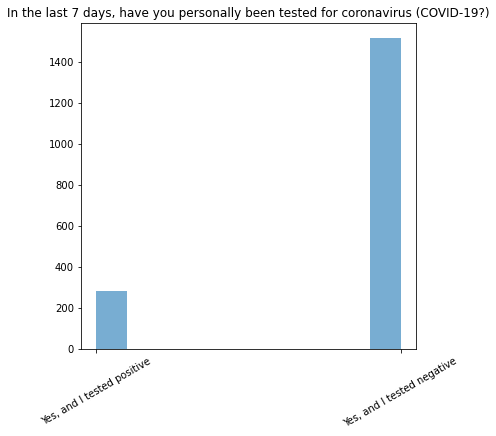

In [61]:
plt.figure(figsize=(6,6))
plt.hist(df['i3_health'], alpha=0.6)
ticks = [1.0,2.0]
labels = ["Yes, and I tested positive","Yes, and I tested negative"]
plt.xticks(ticks, labels, rotation=30)
plt.title("In the last 7 days, have you personally been tested for coronavirus (COVID-19?)")
plt.show()

### Predictor Variables
Lets assess our list of predictors variables, and select the ones we find valuable to include in our KNN model

In [62]:
df.describe()

,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i5_health_99,i9_health,i10_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_9,i12_health_10,i12_health_11,i12_health_12,i12_health_13,i12_health_14,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,i12_health_20,i13_health,i14_health_1,i14_health_2,i14_health_3,i14_health_4,i14_health_5,i14_health_6,i14_health_7,i14_health_8,i14_health_9,i14_health_10,i14_health_96,i14_health_98,i14_health_99,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_12,d1_health_13,d1_health_98,d1_health_99,weight,gender,age,household_size,employment_status
count,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.00000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.00000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000
mean,5.559889,11.032312,2.823955,1.844011,7.659053,3.391643,3.349304,3.368802,3.350418,3.376602,3.848468,17.637326,13.711978,13.243454,1.759889,1.680223,1.822284,1.693036,1.781058,2.302507,2.29415,2.000000,41.417270,39.035097,2.107521,2.199443,2.078552,1.919220,1.883565,2.302507,2.871309,2.764903,1.985515,2.007242,13.539833,40.028969,40.028969,40.043454,40.056267,39.987744,39.986630,39.962674,39.982730,39.983287,39.974373,39.982173,39.972145,40.061838,7.585515,7.597214,7.529805,7.491365,7.518663,7.564903,7.47688,7.496379,7.616713,7.574373,7.477994,7.533705,7.463510,7.473538,7.806685,1.093534,1.378273,38.832312,3.556546,2.699164
std,45.407288,69.588471,7.358641,0.362946,21.505299,17.633986,17.640880,17.637718,17.640700,17.636447,17.552927,36.387155,31.489342,31.323416,1.081802,1.002352,1.086634,1.040930,1.132512,1.204030,1.36909,1.262176,47.370739,47.075172,1.225029,1.240482,1.181878,1.175106,1.125033,1.199856,1.611565,1.524382,1.094637,1.133484,54.089174,48.500011,48.500011,48.488196,48.477738,48.533601,48.534508,48.553999,48.537682,48.537229,48.544483,48.538136,48.546296,48.473189,26.078751,26.075568,26.093832,26.104163,26.096832,26.084346,26.10804,26.102819,26.070250,26.081777,26.107742,26.092780,26.111611,26.108934,26.017616,0.705421,0.485091,15.605550,2.058104,1.915080
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088543,1.000000,18.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [63]:
df_num = df[['i1_health', 'i2_health', 'i7a_health', 'i13_health', 'age']]
#these were the variables that were originally numeric and not converted

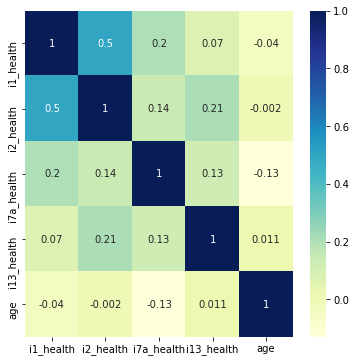

In [64]:
plt.figure(figsize=(6,6))
sns.heatmap(df_num.corr(method='pearson'),cmap="YlGnBu", annot=True)
plt.show()

Lets see the histogram and KDE of all our variables in the below two cells:

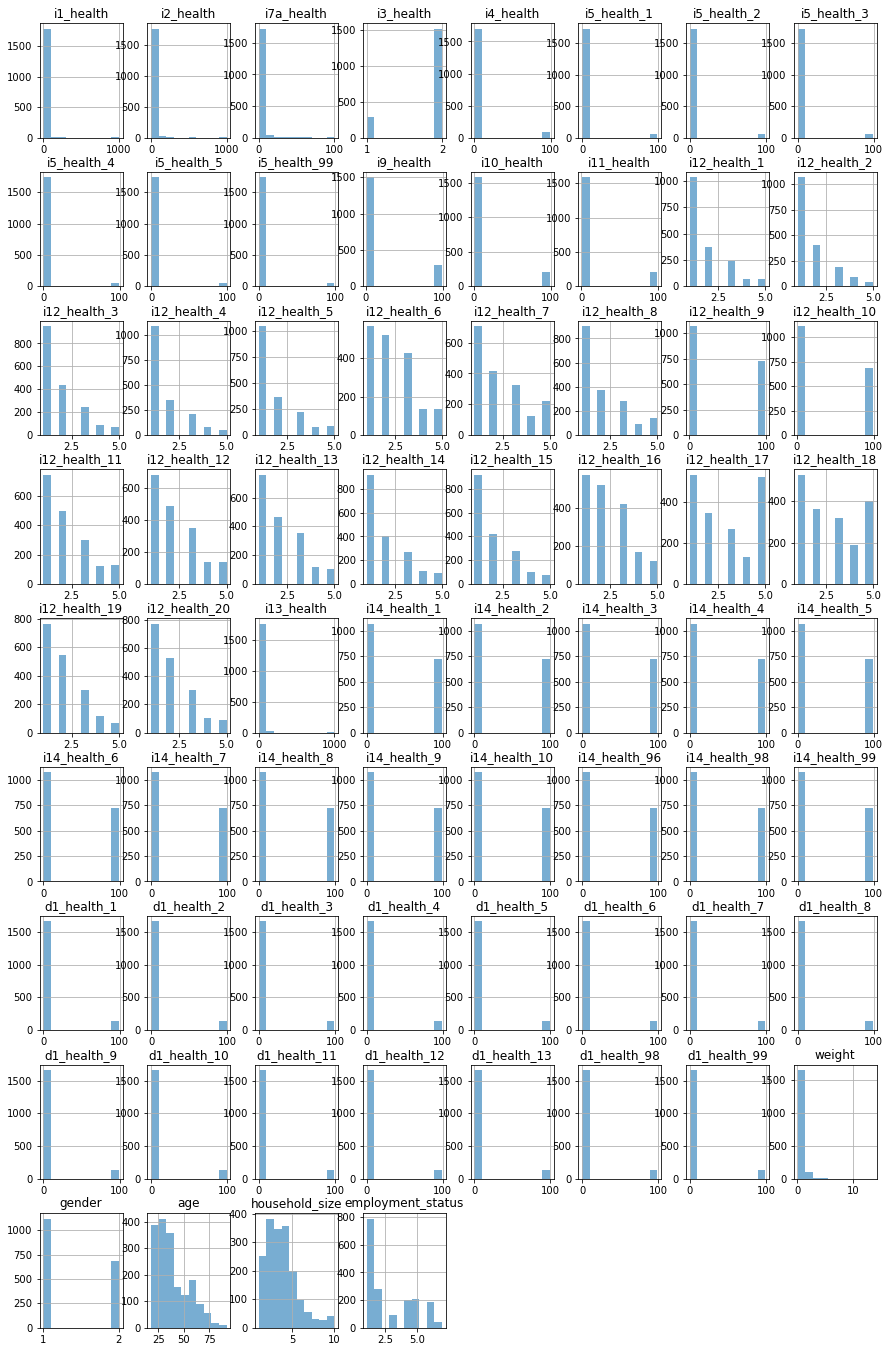

In [65]:
df.hist(figsize=(15,24), alpha=0.6)
plt.show()

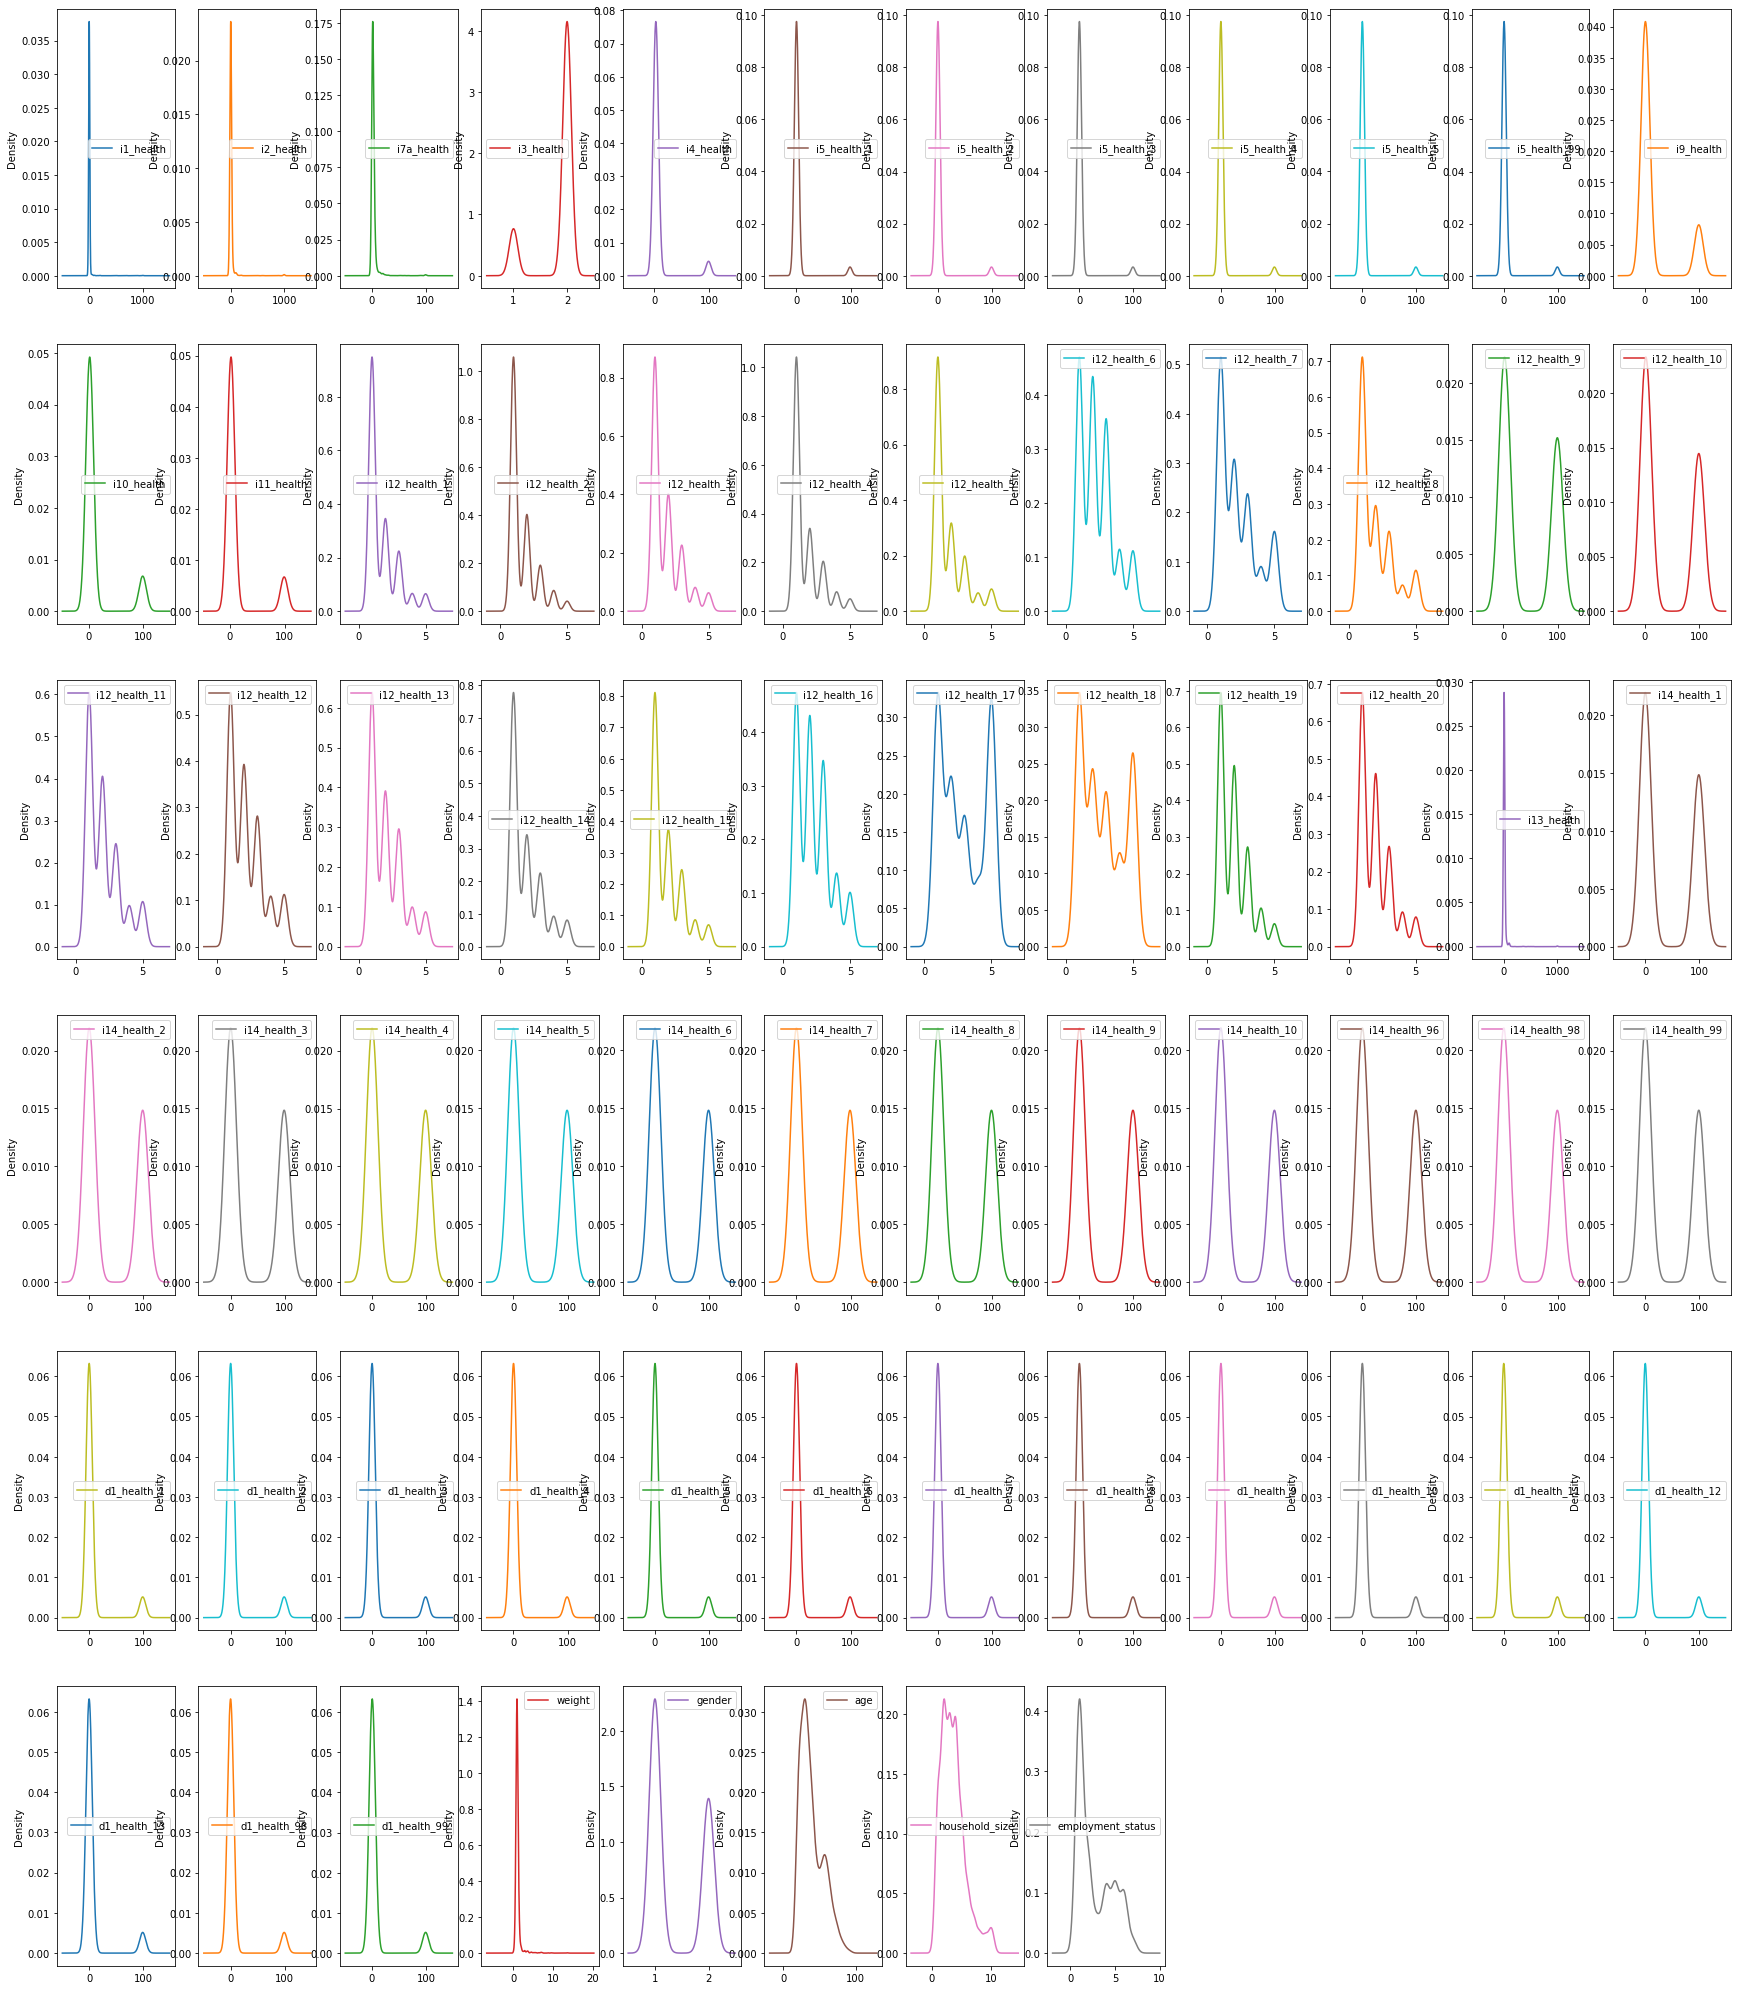

In [66]:
df.plot(figsize=(30,36), kind='density',subplots=True,layout=(6,12), sharex=False)
plt.show()

Lets quickly look at all potential predictor variables through normalized cross tab bar charts.

We will then select the ones we want to focus on.

C:\Users\irene\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


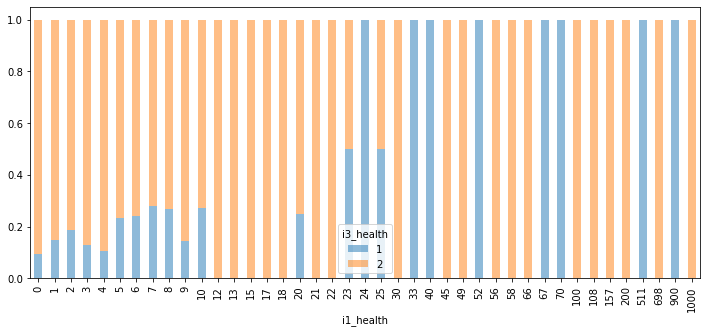

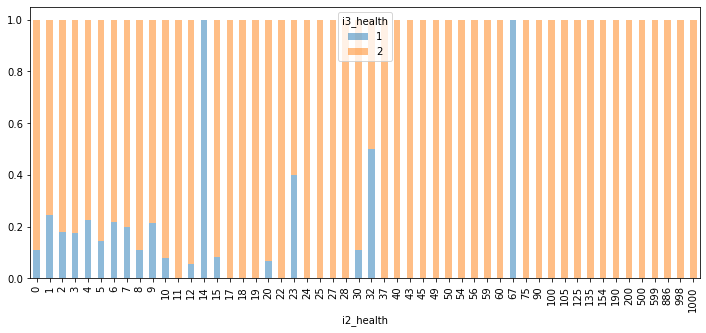

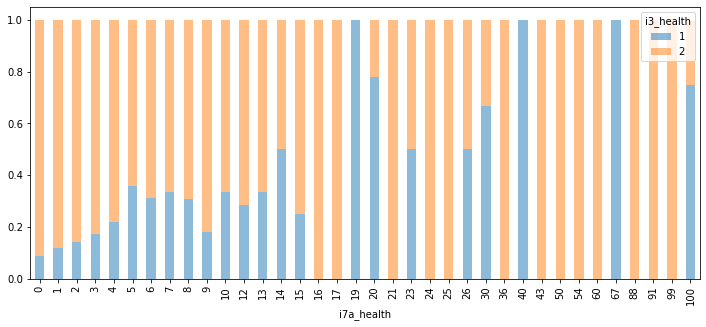

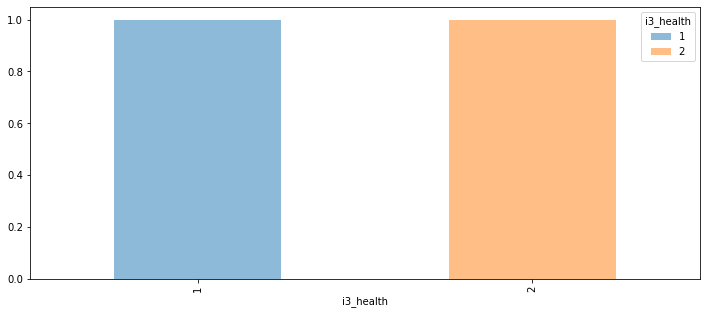

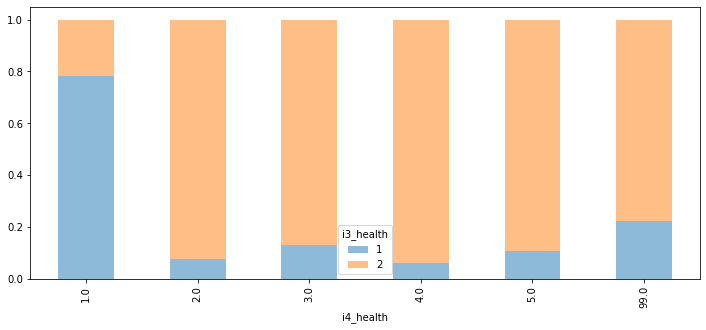

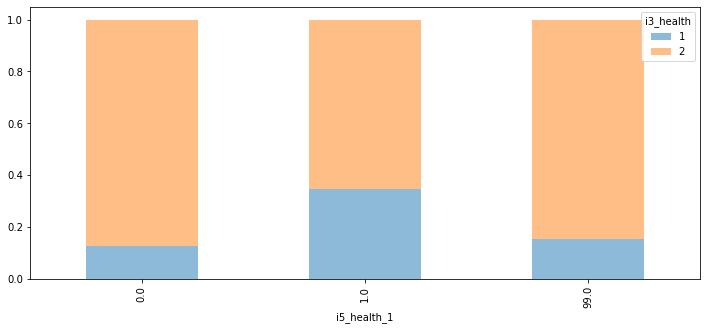

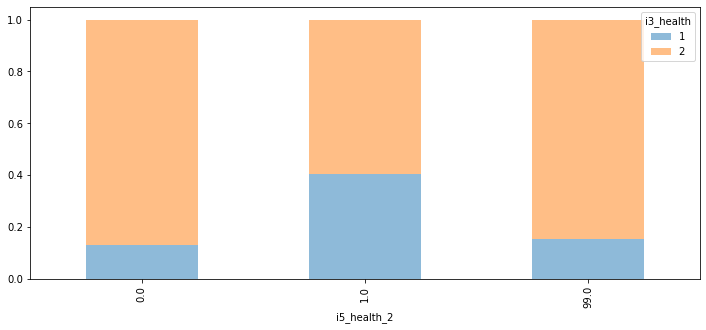

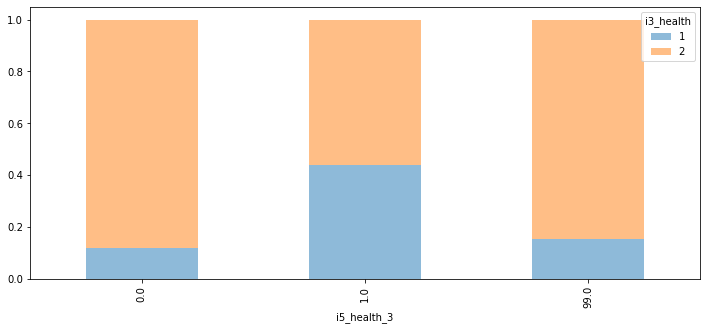

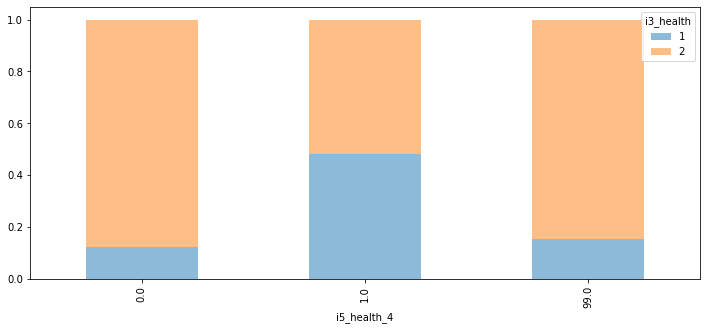

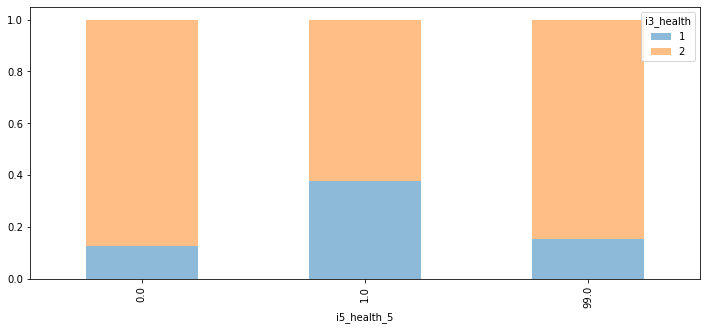

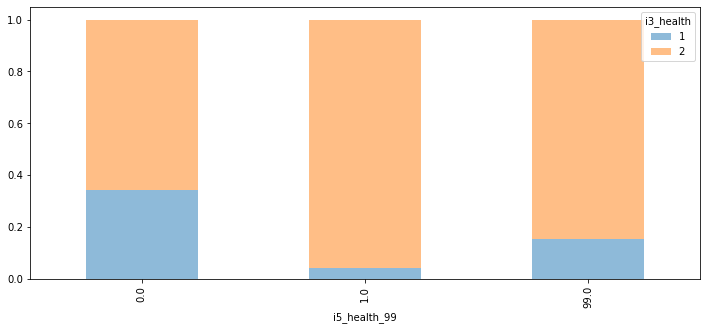

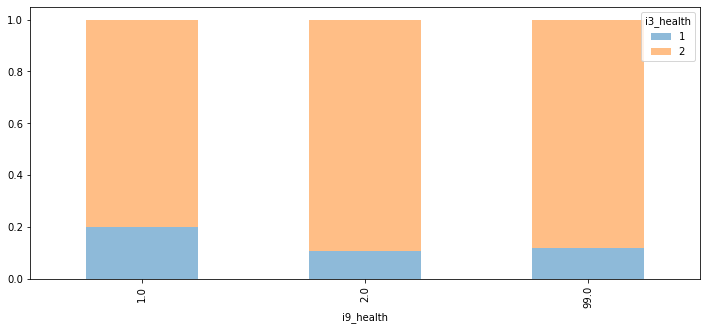

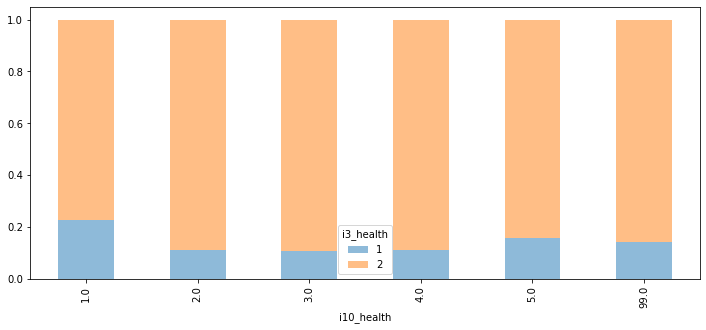

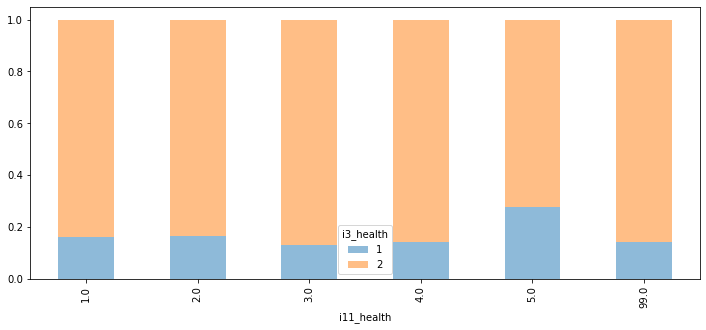

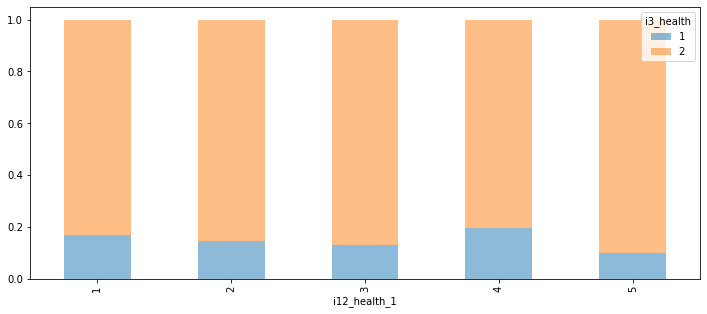

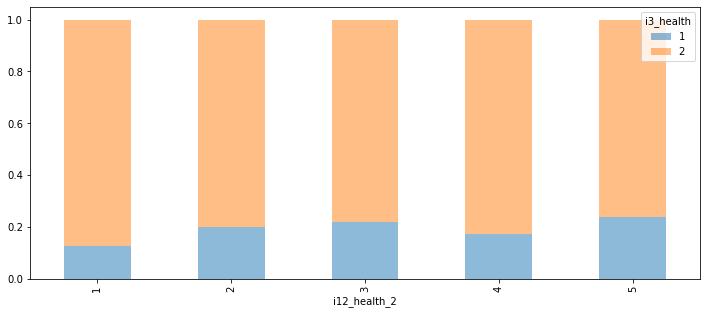

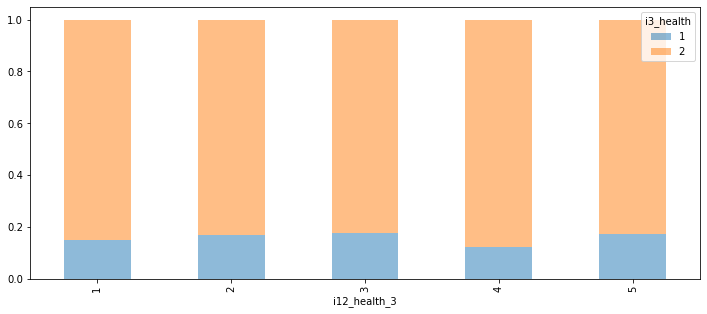

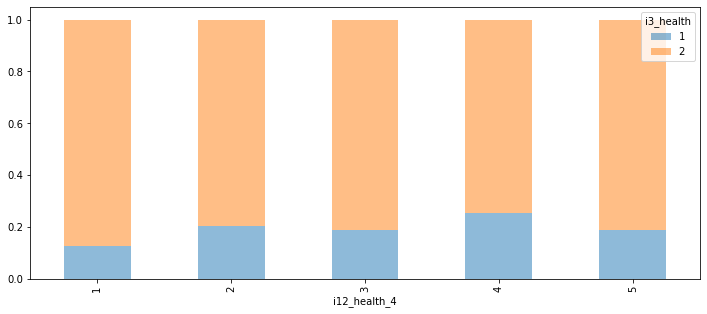

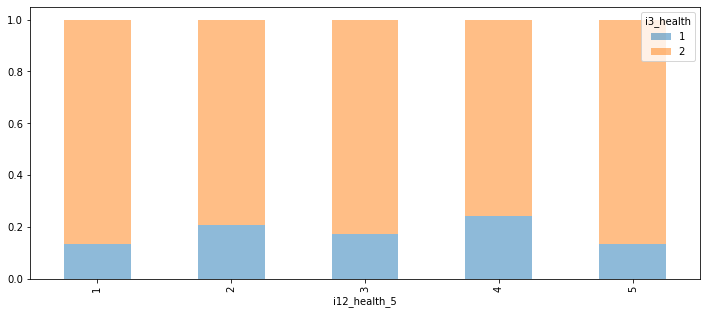

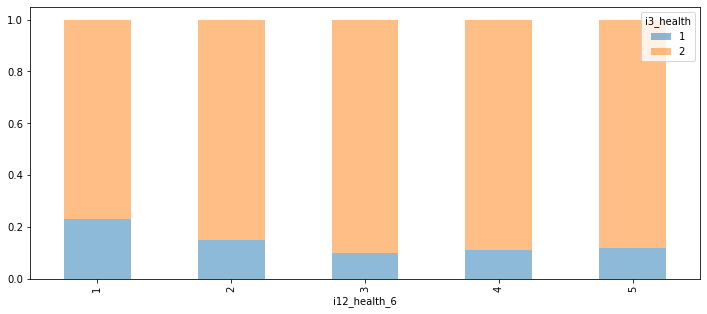

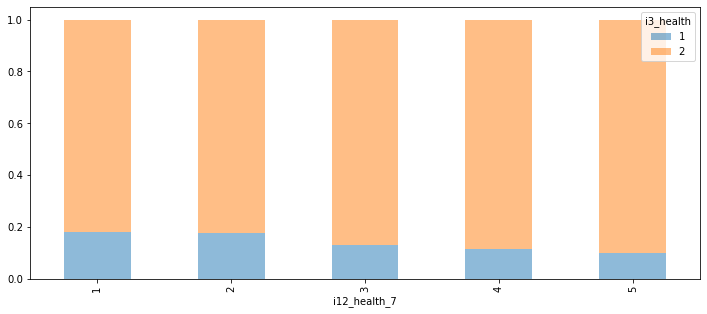

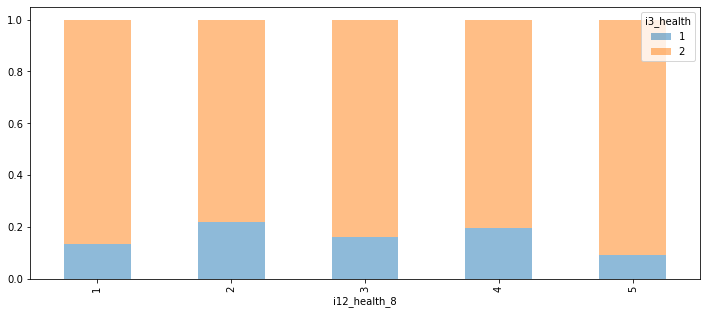

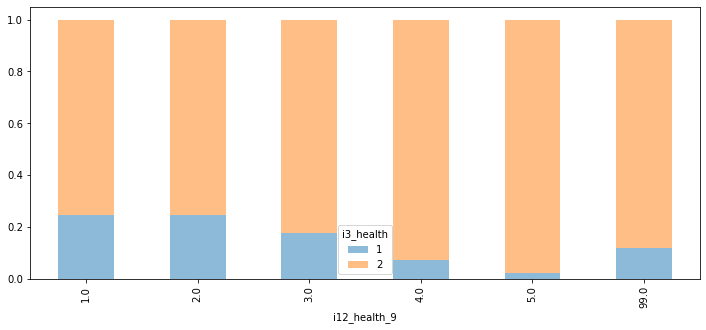

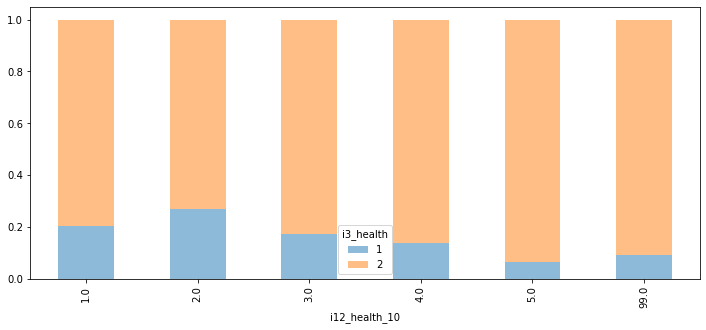

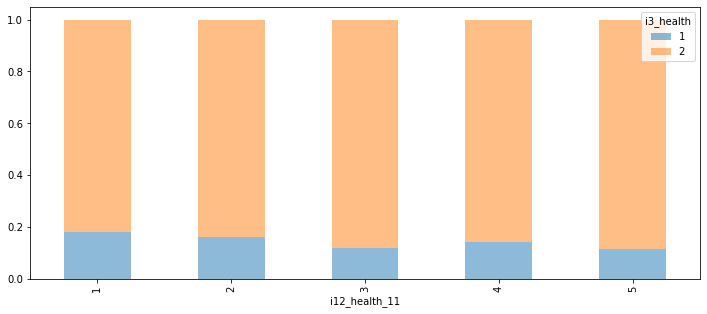

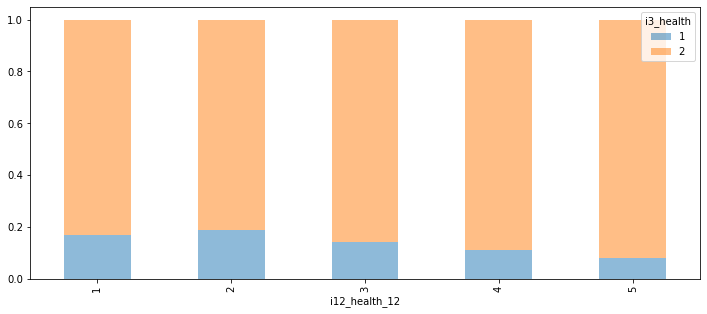

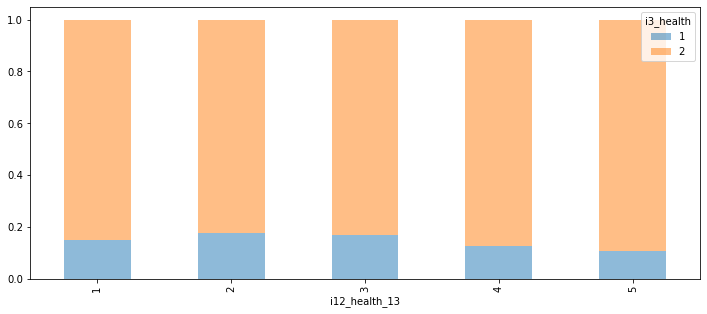

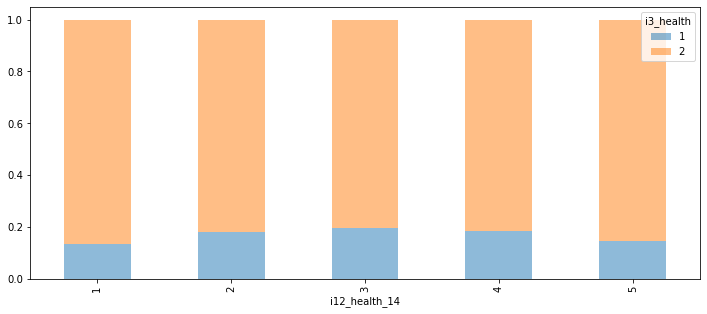

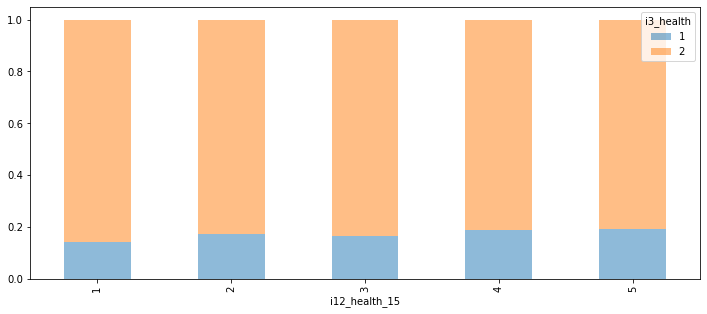

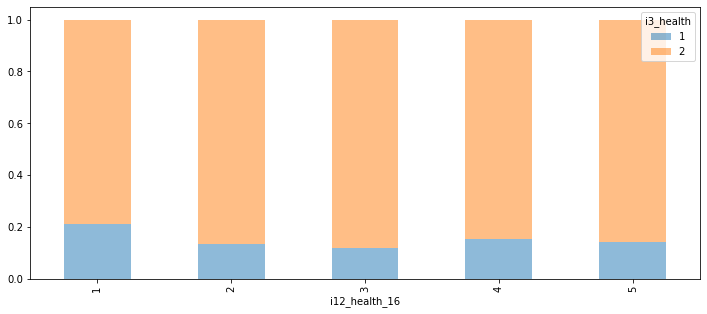

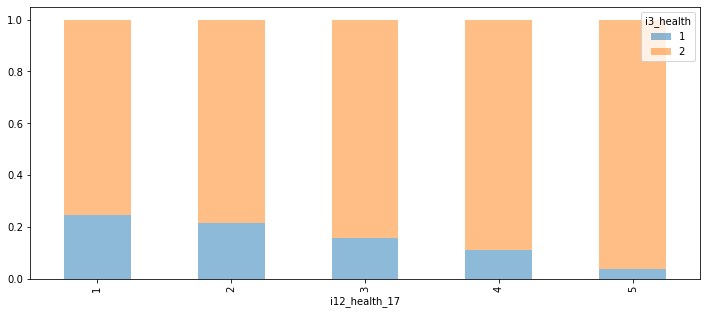

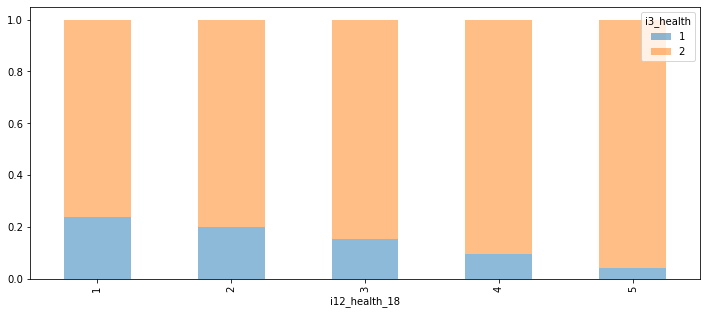

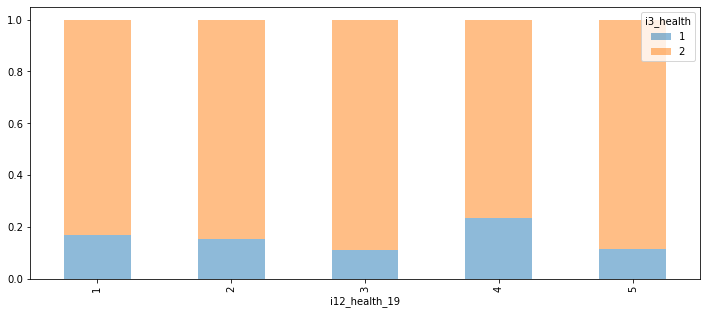

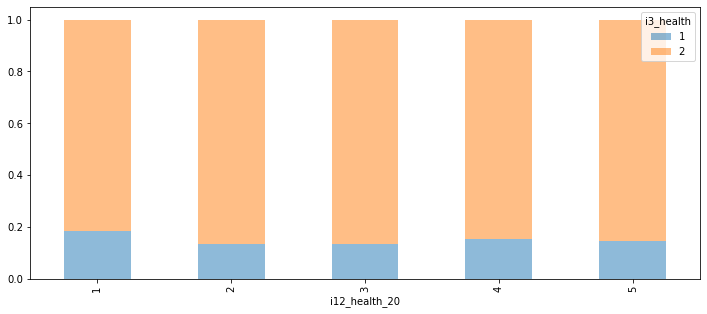

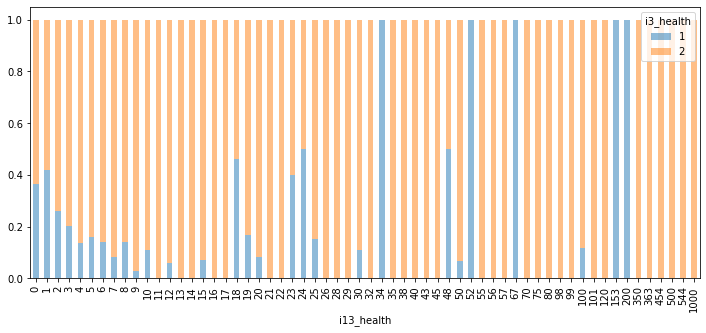

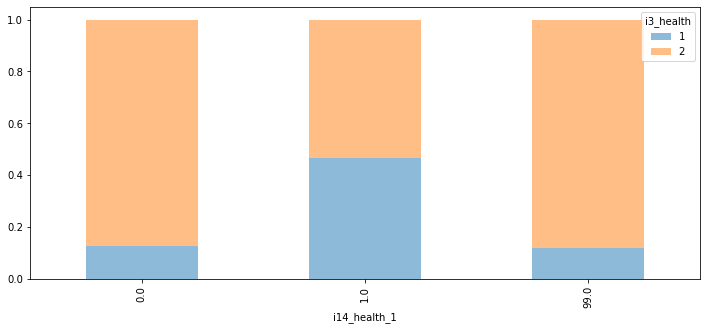

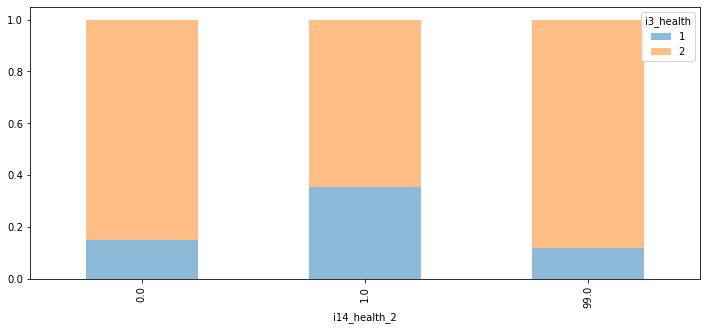

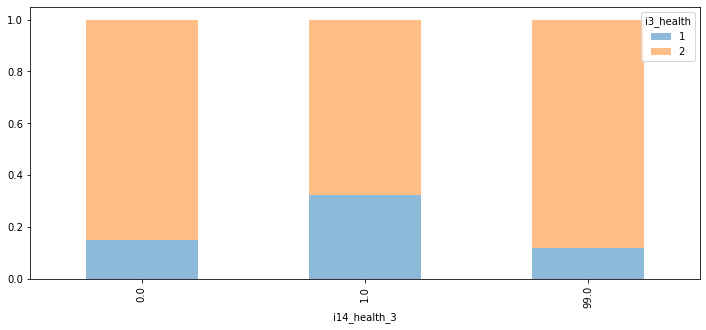

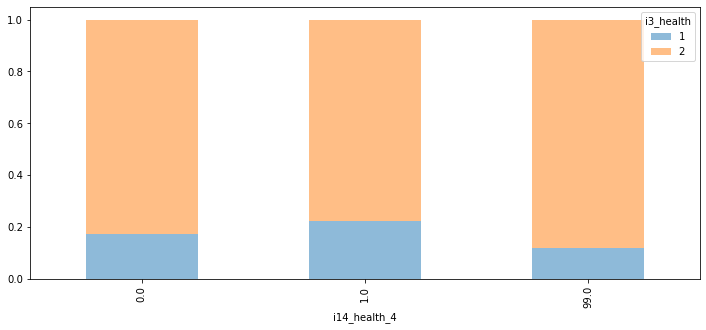

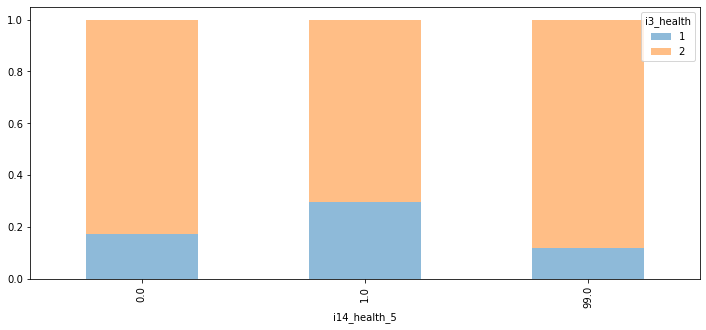

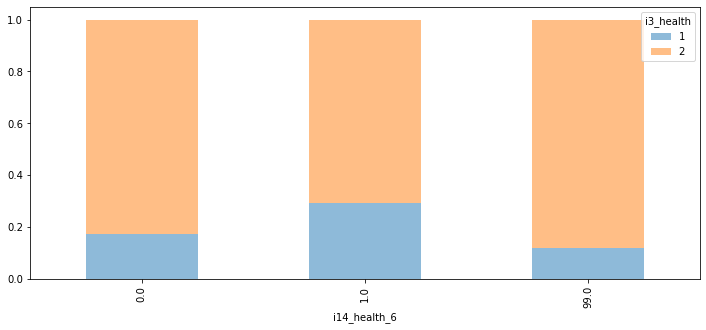

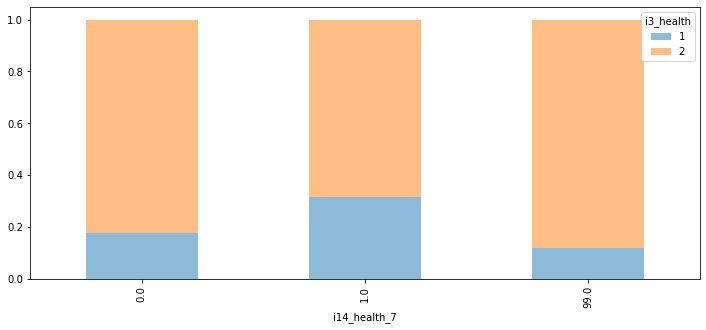

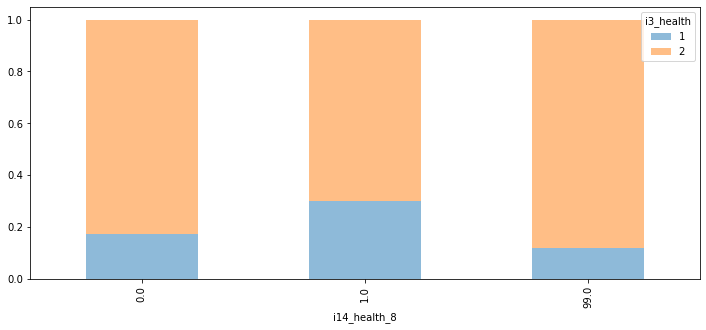

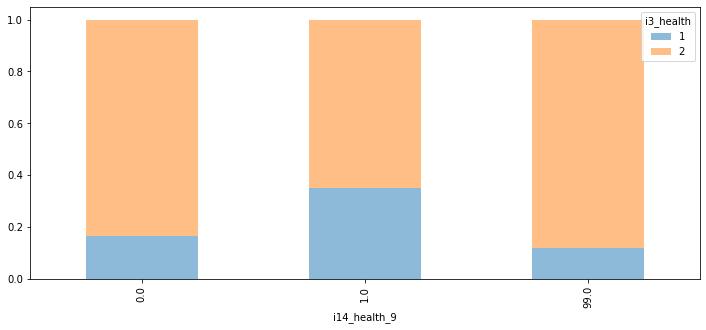

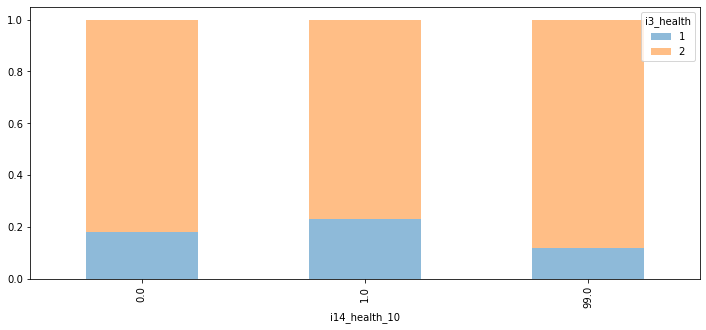

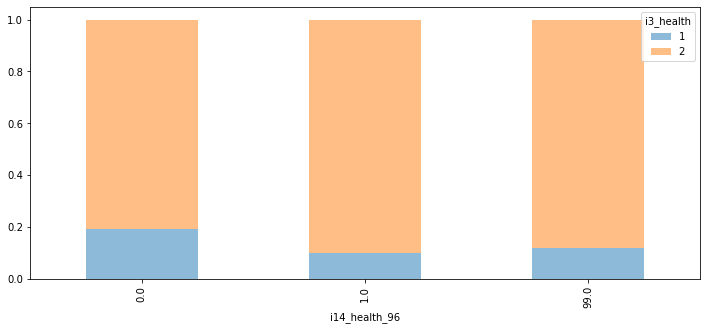

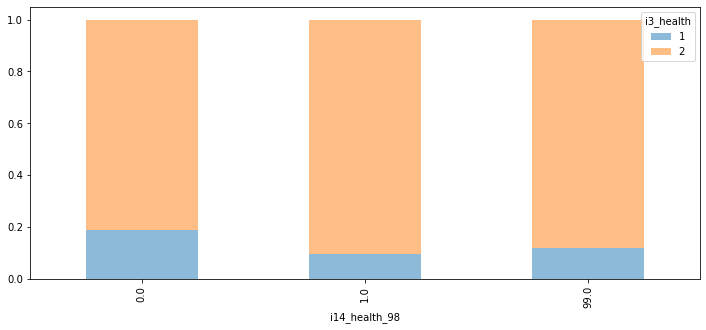

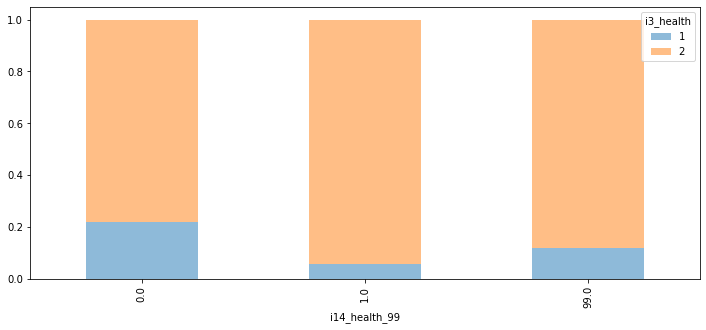

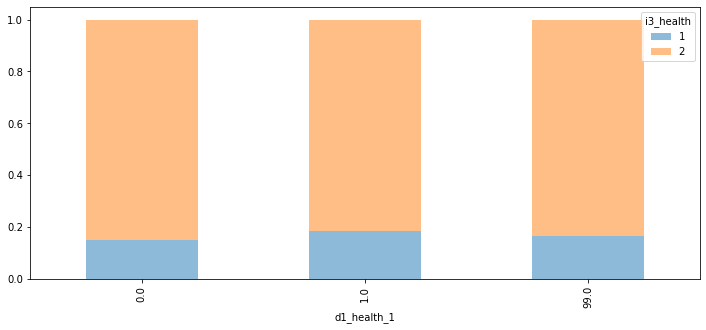

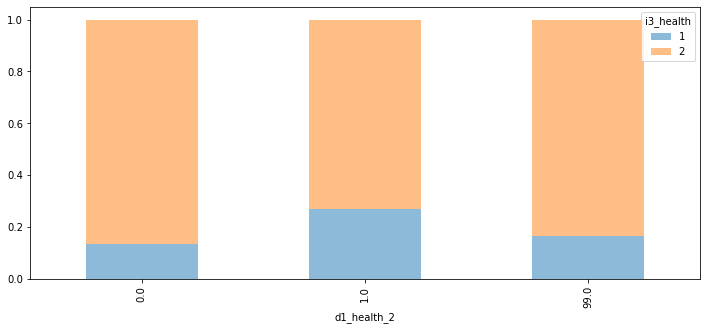

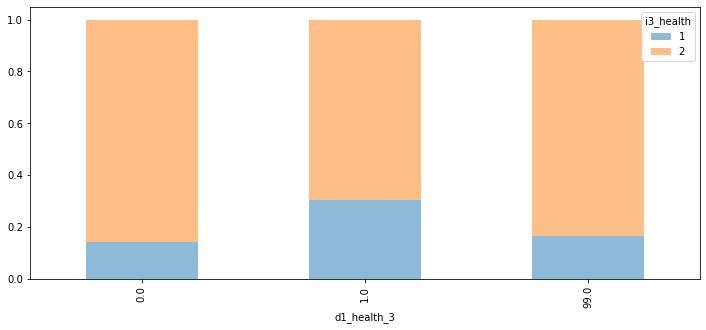

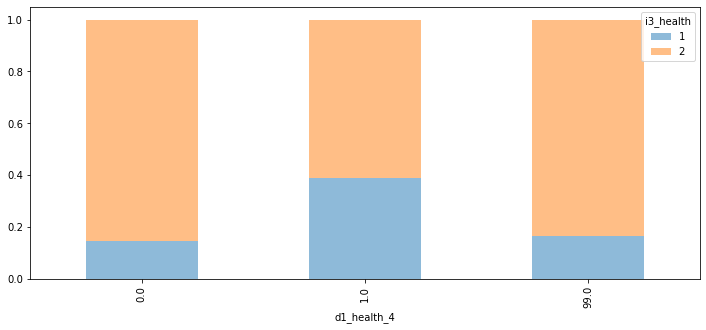

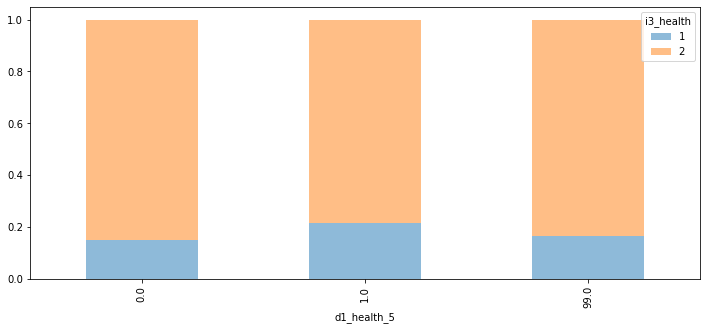

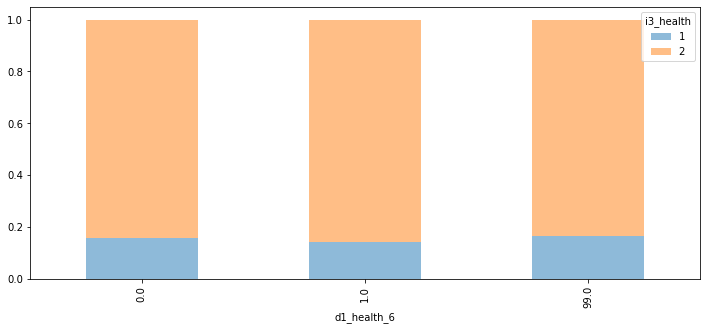

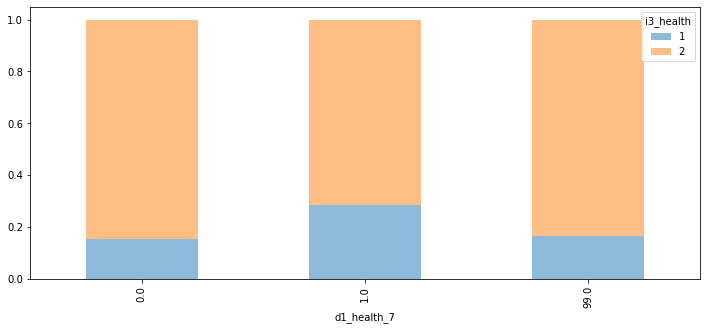

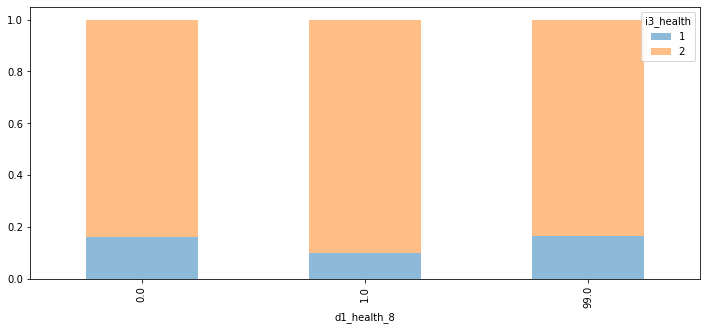

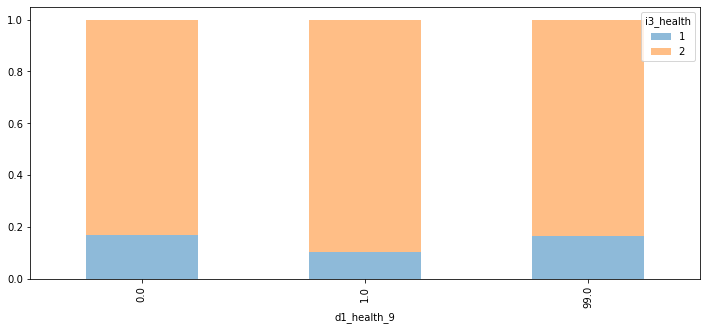

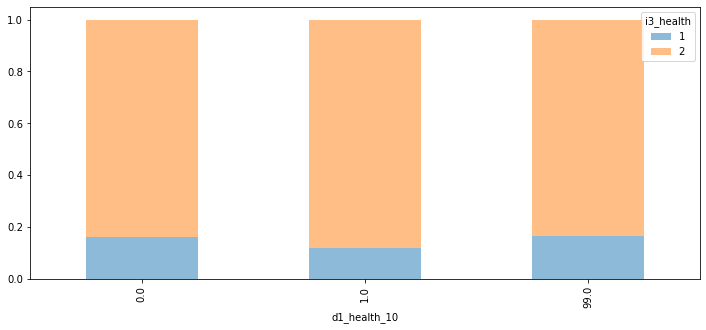

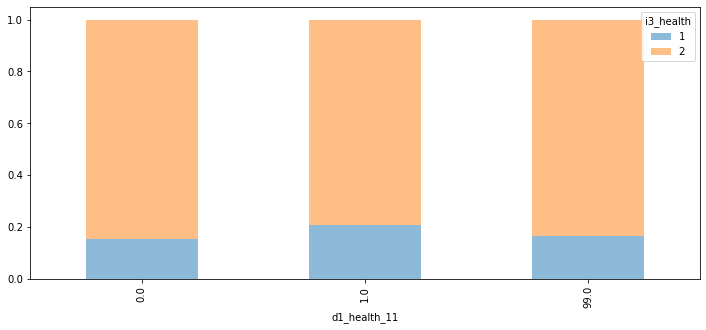

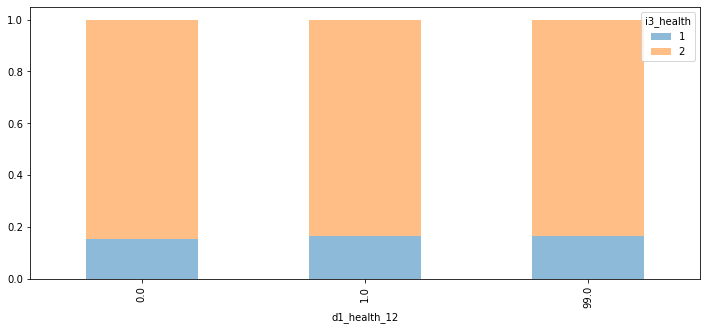

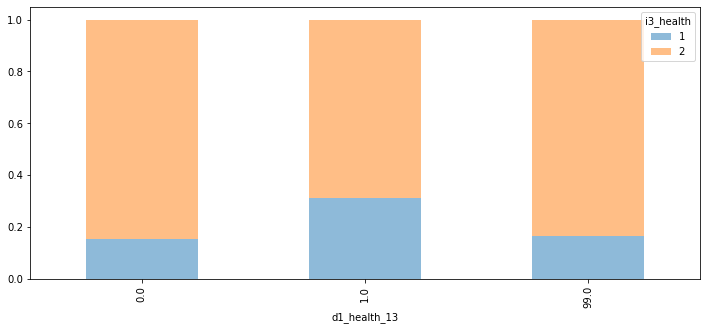

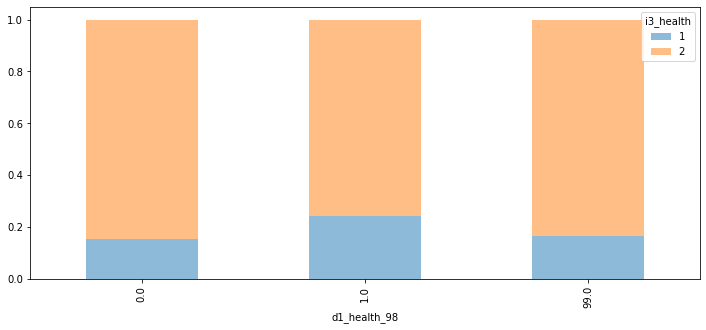

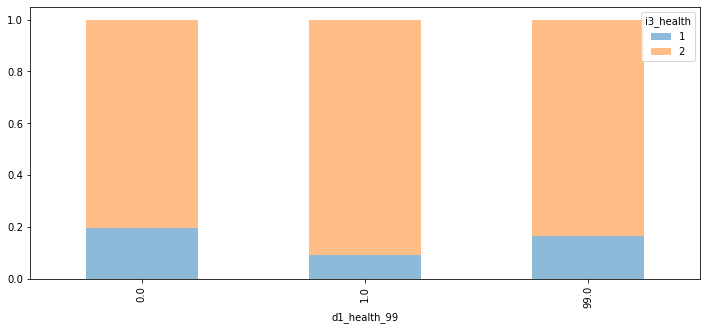

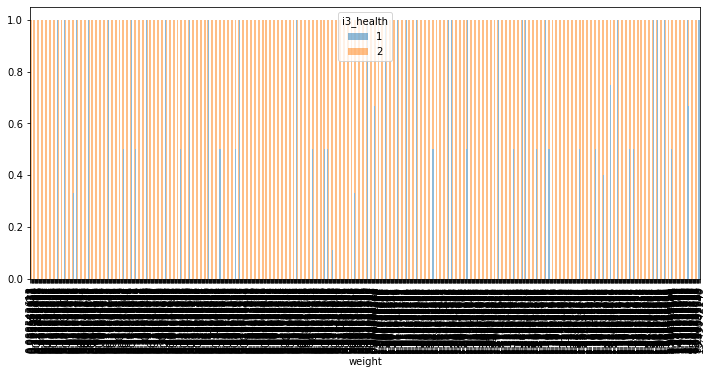

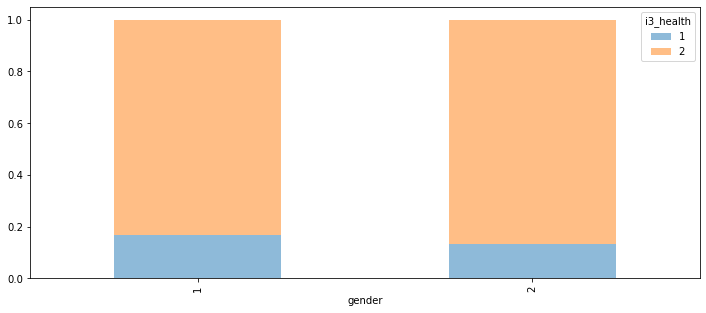

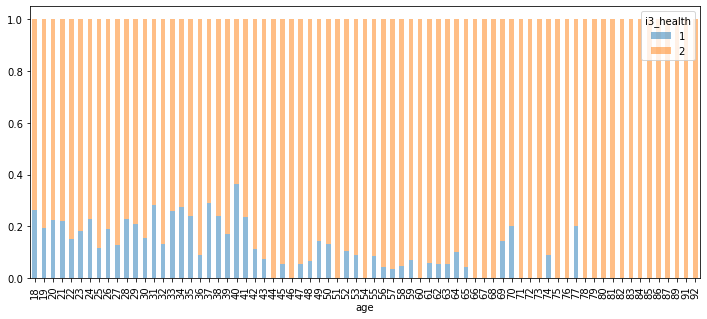

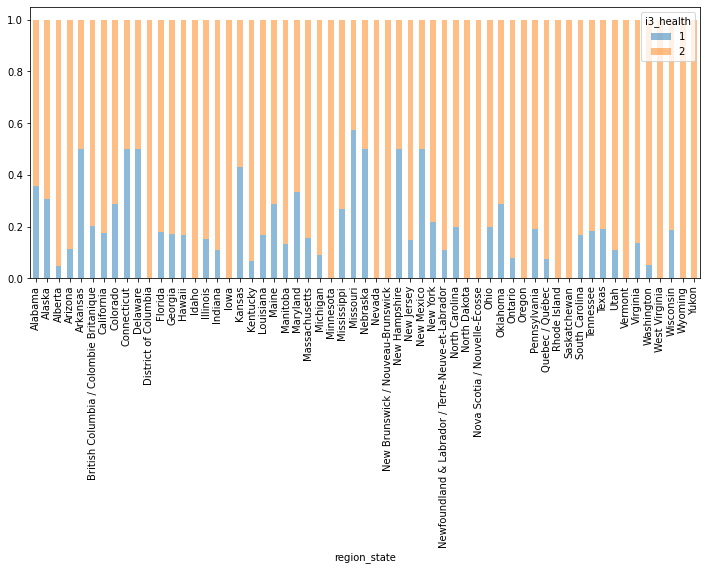

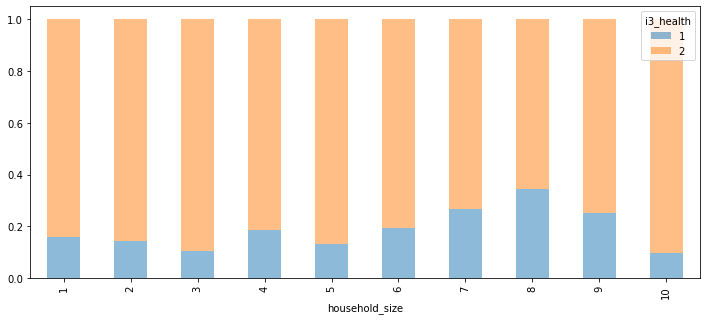

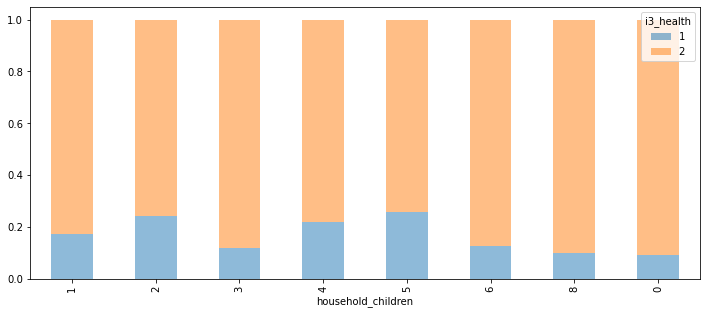

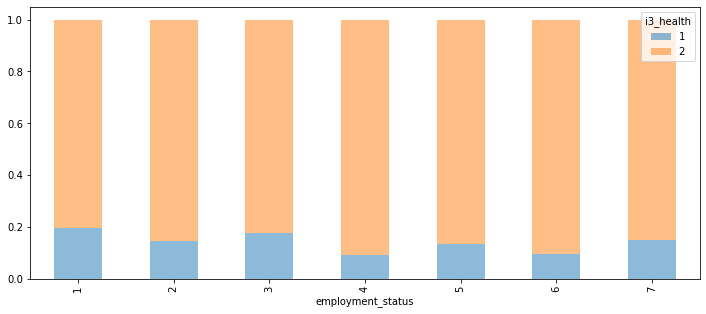

In [67]:
for column in df:
    df_crosstab = pd.crosstab(index = df[column], columns=df["i3_health"],margins=False)
    df_crosstab_norm = df_crosstab.div(df_crosstab.sum(axis=1),axis=0)
    df_crosstab_norm.plot(kind='bar',stacked=True,alpha=0.5,figsize=(12,5))

**Below**, we explore on some predictor variables of interest which may help in the prediction of our target variable.

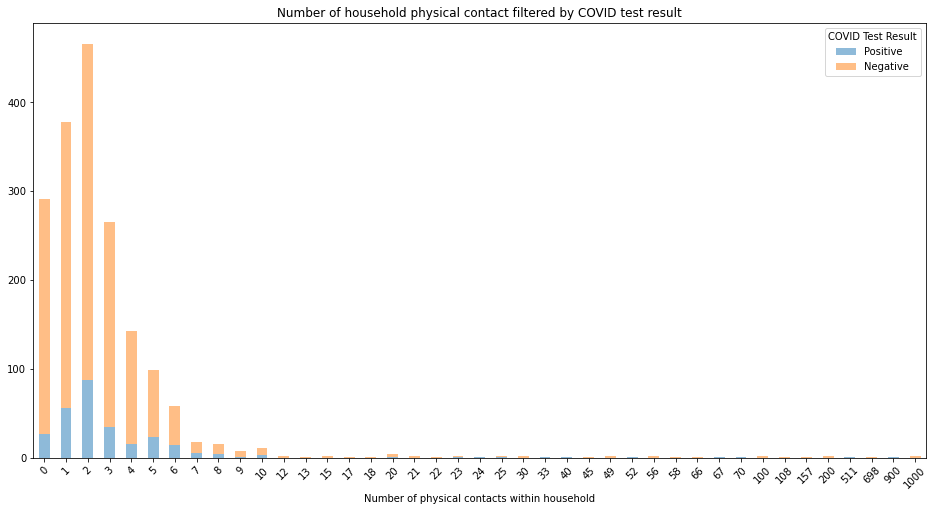

In [68]:
crosstab = pd.crosstab(df["i1_health"], df["i3_health"])
crosstab.plot(kind="bar", stacked=True, title="Number of household physical contact filtered by COVID test result", alpha=0.5,figsize=(16,8))
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Number of physical contacts within household")
plt.show()

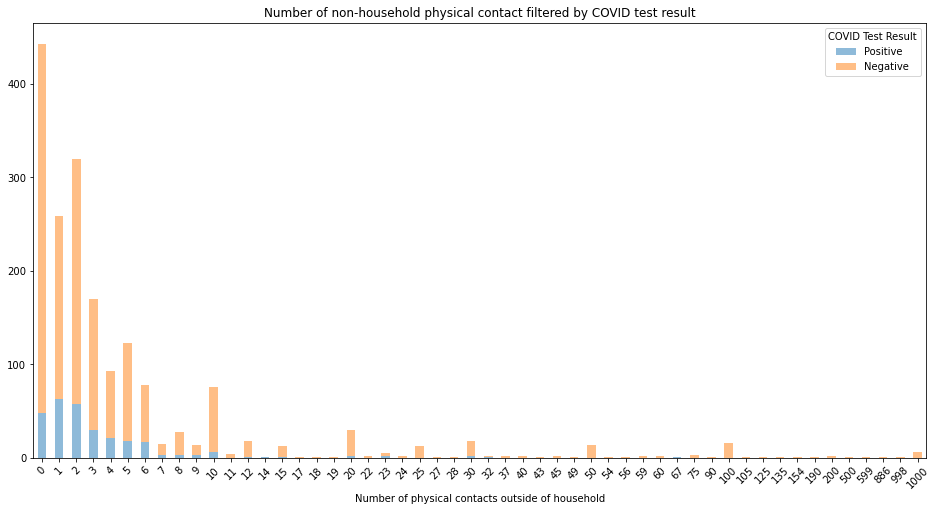

In [69]:
crosstab = pd.crosstab(df["i2_health"], df["i3_health"])
crosstab.plot(kind="bar", stacked=True, title="Number of non-household physical contact filtered by COVID test result", alpha=0.5,figsize=(16,8))
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Number of physical contacts outside of household")
plt.show()

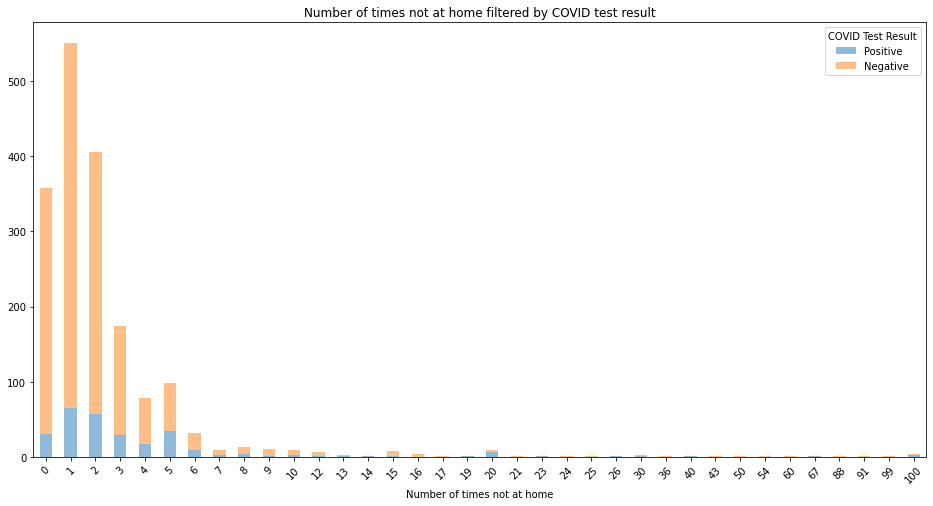

In [70]:
crosstab = pd.crosstab(df["i7a_health"], df["i3_health"])
crosstab.plot(kind="bar", stacked=True, title="Number of times not at home filtered by COVID test result", alpha=0.5,figsize=(16,8))
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Number of times not at home")
plt.show()

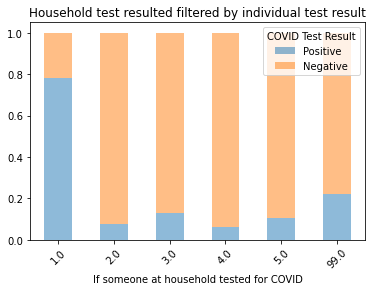

In [71]:
crosstab = pd.crosstab(df["i4_health"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Household test resulted filtered by individual test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("If someone at household tested for COVID")
plt.show()

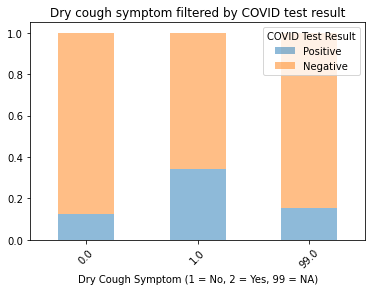

In [72]:
crosstab = pd.crosstab(df["i5_health_1"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Dry cough symptom filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Dry Cough Symptom (1 = No, 2 = Yes, 99 = NA)")
plt.show()

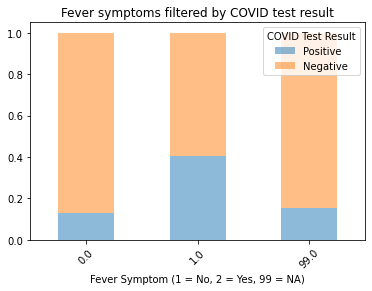

In [73]:
crosstab = pd.crosstab(df["i5_health_2"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Fever symptoms filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Fever Symptom (1 = No, 2 = Yes, 99 = NA)")
plt.show()

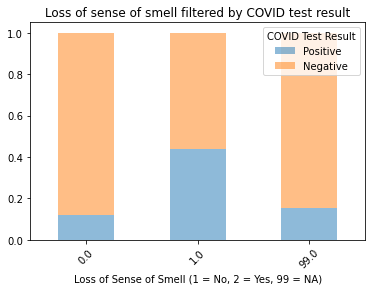

In [74]:
crosstab = pd.crosstab(df["i5_health_3"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Loss of sense of smell filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Loss of Sense of Smell (1 = No, 2 = Yes, 99 = NA)")
plt.show()

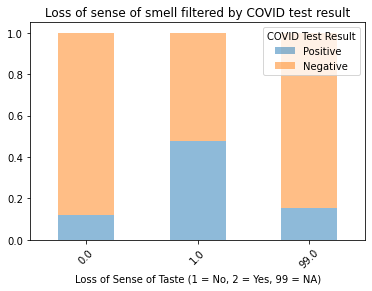

In [75]:
crosstab = pd.crosstab(df["i5_health_4"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Loss of sense of smell filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Loss of Sense of Taste (1 = No, 2 = Yes, 99 = NA)")
plt.show()

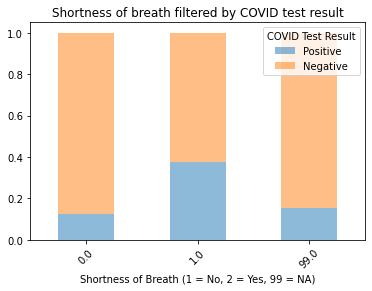

In [76]:
crosstab = pd.crosstab(df["i5_health_5"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Shortness of breath filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Shortness of Breath (1 = No, 2 = Yes, 99 = NA)")
plt.show()

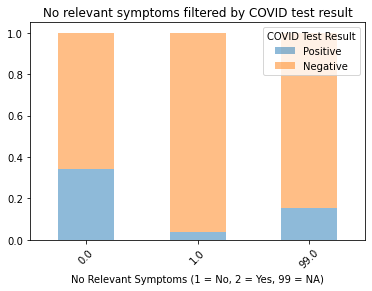

In [77]:
crosstab = pd.crosstab(df["i5_health_99"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="No relevant symptoms filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("No Relevant Symptoms (1 = No, 2 = Yes, 99 = NA)")
plt.show()

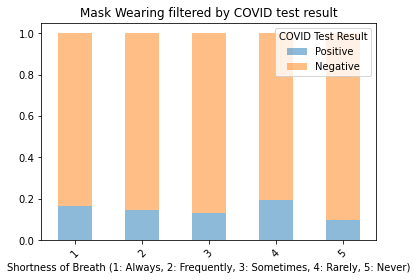

In [78]:
crosstab = pd.crosstab(df["i12_health_1"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Mask Wearing filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Shortness of Breath (1: Always, 2: Frequently, 3: Sometimes, 4: Rarely, 5: Never)")
plt.show()

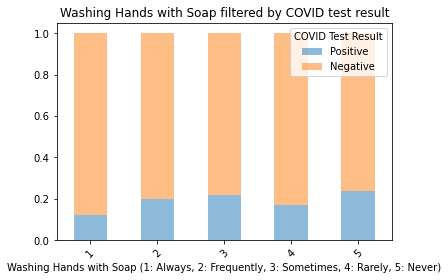

In [79]:
crosstab = pd.crosstab(df["i12_health_2"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Washing Hands with Soap filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Washing Hands with Soap (1: Always, 2: Frequently, 3: Sometimes, 4: Rarely, 5: Never)")
plt.show()

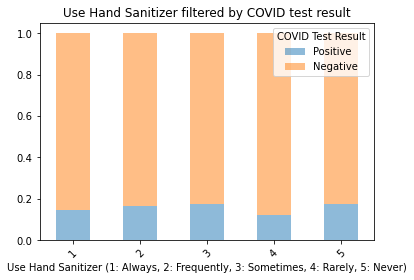

In [80]:
crosstab = pd.crosstab(df["i12_health_3"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Use Hand Sanitizer filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Use Hand Sanitizer (1: Always, 2: Frequently, 3: Sometimes, 4: Rarely, 5: Never)")
plt.show()

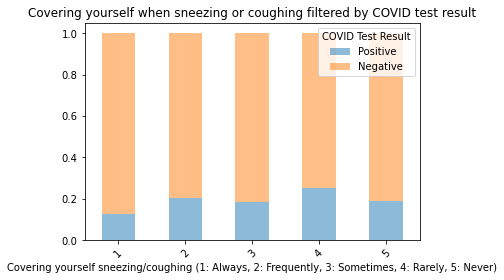

In [81]:
crosstab = pd.crosstab(df["i12_health_4"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Covering yourself when sneezing or coughing filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Covering yourself sneezing/coughing (1: Always, 2: Frequently, 3: Sometimes, 4: Rarely, 5: Never)")
plt.show()

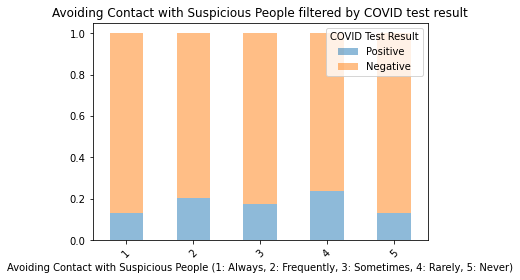

In [82]:
crosstab = pd.crosstab(df["i12_health_5"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Avoiding Contact with Suspicious People filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Avoiding Contact with Suspicious People (1: Always, 2: Frequently, 3: Sometimes, 4: Rarely, 5: Never)")
plt.show()

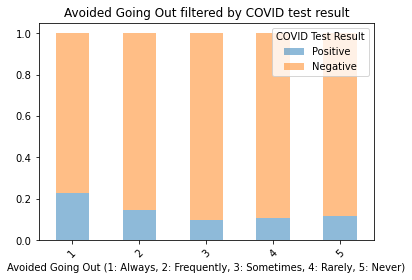

In [83]:
crosstab = pd.crosstab(df["i12_health_6"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Avoided Going Out filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Avoided Going Out (1: Always, 2: Frequently, 3: Sometimes, 4: Rarely, 5: Never)")
plt.show()

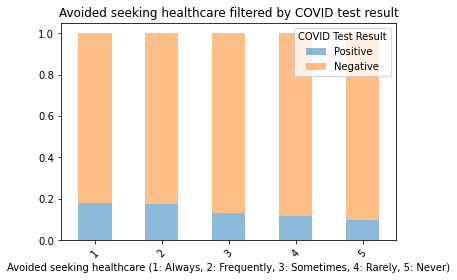

In [84]:
crosstab = pd.crosstab(df["i12_health_7"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Avoided seeking healthcare filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Avoided seeking healthcare (1: Always, 2: Frequently, 3: Sometimes, 4: Rarely, 5: Never)")
plt.show()

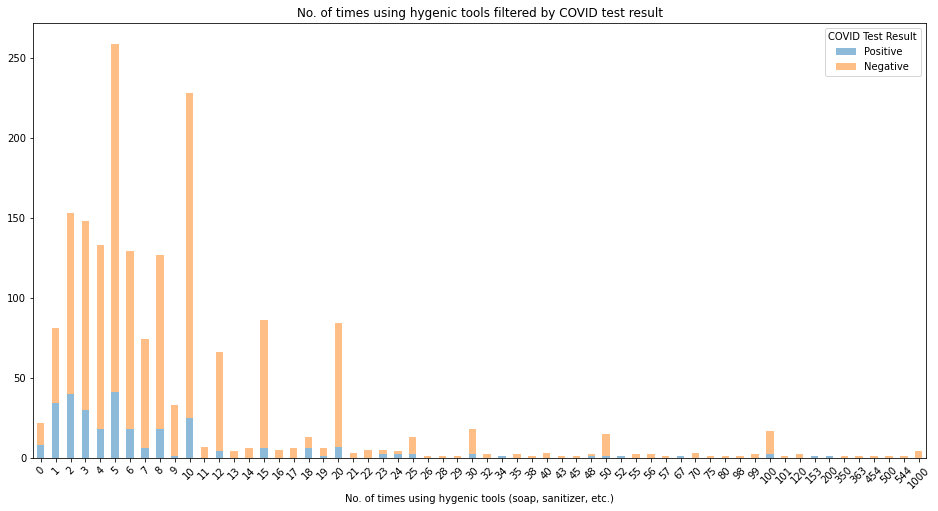

In [85]:
crosstab = pd.crosstab(df["i13_health"], df["i3_health"])
crosstab.plot(kind="bar", stacked=True, title="No. of times using hygenic tools filtered by COVID test result", alpha=0.5, figsize=(16,8))
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("No. of times using hygenic tools (soap, sanitizer, etc.)")
plt.show()

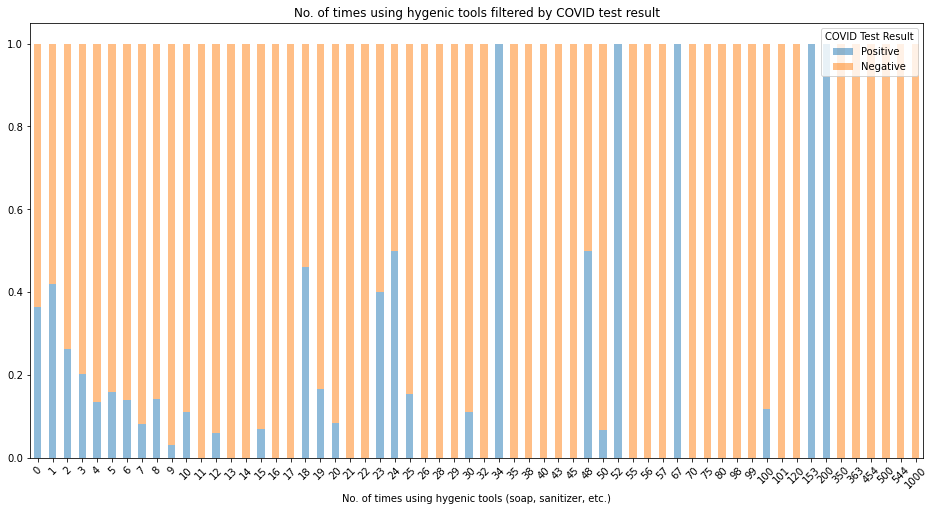

In [86]:
#normalized version of above graph
crosstab = pd.crosstab(df["i13_health"], df["i3_health"], normalize="index")
crosstab.plot(kind="bar", stacked=True, title="No. of times using hygenic tools filtered by COVID test result", alpha=0.5, figsize=(16,8))
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("No. of times using hygenic tools (soap, sanitizer, etc.)")
plt.show()

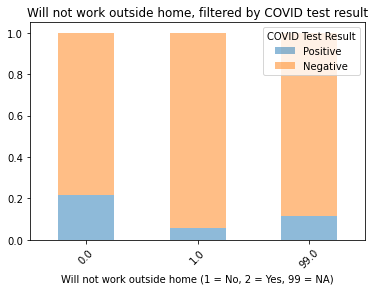

In [87]:
crosstab = pd.crosstab(df["i14_health_99"], df["i3_health"], normalize="index")
crosstab.plot(kind="bar", stacked=True, title="Will not work outside home, filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Will not work outside home (1 = No, 2 = Yes, 99 = NA)")
plt.show()

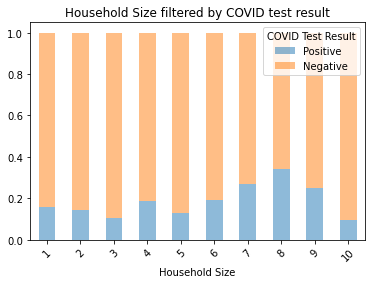

In [88]:
crosstab = pd.crosstab(df["household_size"], df["i3_health"], normalize="index")
crosstab.plot(kind="bar", stacked=True, title="Household Size filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Household Size")
plt.show()

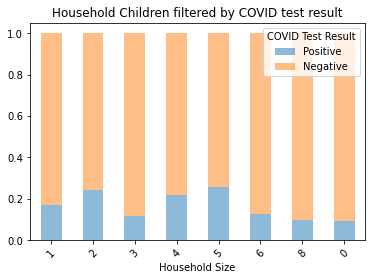

In [89]:
crosstab = pd.crosstab(df["household_children"], df["i3_health"], normalize="index")
crosstab.plot(kind="bar", stacked=True, title="Household Children filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Household Size")
plt.show()

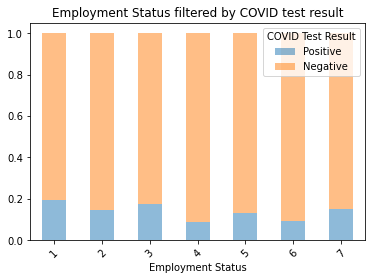

In [90]:
crosstab = pd.crosstab(df["employment_status"], df["i3_health"], normalize="index")
crosstab.plot(kind="bar", stacked=True, title="Employment Status filtered by COVID test result", alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Employment Status")
plt.show()

Please use the following relationship for the above graph:

    'Full time employment':1,
    'Part time employment':2,
    'Full time student':3,
    'Retired':4,
    'Unemployed':5,
    'Not working':6,
    'Other':7"

In [91]:
df = df.copy()

## Transformation
After assessing all the potential predictor variables, we decided to apply transformations to create new variables that can help summarize key findings.

The new variables include:
- COVID Common Symptoms (utilizes data from the i5_health variables. It will be numeric, representing # of common symptoms experienced by the patient)

- Hygiene Practice Score (utilizes data from the i12_health variables. Categorical but represented via numbers. The lower the better: from 1-always to 5-not at all)

- Chronic Disease (utilizes data from the d1_health variables. It will be numeric, representing the # of chronic disease experienced by the patient)

We will also use binning for the age variable.

Final selection of predictors will be shown in the next section.

In [92]:
df['num_common_symptoms'] = 0
df['poor_hygiene_practice'] = 99
df['num_chronic_disease'] = 99
df["age_bin1"] = df["age"]
df["age_bin2"] = df["age"]
df.head()

,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i5_health_99,i9_health,i10_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_9,i12_health_10,i12_health_11,i12_health_12,i12_health_13,i12_health_14,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,i12_health_20,i13_health,i14_health_1,i14_health_2,i14_health_3,i14_health_4,i14_health_5,i14_health_6,i14_health_7,i14_health_8,i14_health_9,i14_health_10,i14_health_96,i14_health_98,i14_health_99,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_12,d1_health_13,d1_health_98,d1_health_99,weight,gender,age,region_state,household_size,household_children,employment_status,num_common_symptoms,poor_hygiene_practice,num_chronic_disease,age_bin1,age_bin2
103,1,1,2,2,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2,3,2,2,2,2,3,2,2.0,2.0,2,2,2,2,3,2,3,2,2,3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.007474,1,54,Quebec / Québec,9,1,1,0,99,99,54,54
110,2,5,2,2,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,1,1,3,3,4,3,2,2,99.0,3.0,2,2,1,2,2,2,1,3,4,2,8,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.012842,1,34,Quebec / Québec,1,1,5,0,99,99,34,34
127,3,15,3,2,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1,1,1,1,1,1,1,1,1.0,1.0,1,1,1,1,1,1,1,2,1,1,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.992531,1,36,Ontario,4,4,1,0,99,99,36,36
128,10,10,1,1,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5,1,1,1,1,1,1,5,99.0,99.0,1,1,1,1,1,2,1,4,1,1,10,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.994496,2,64,Ontario,2,0,6,0,99,99,64,64
134,2,10,1,2,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,3,1,2,2,2,2,2,1,2.0,1.0,2,2,2,2,2,2,2,2,2,2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.984166,2,36,Ontario,3,1,1,0,99,99,36,36


In [93]:
df[['i5_health_1', 'i5_health_2', 'i5_health_3', 'i5_health_4','i5_health_5']].tail(10)

,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5
28738,1.0,1.0,0.0,0.0,0.0
28740,0.0,1.0,0.0,0.0,0.0
28747,1.0,0.0,0.0,0.0,0.0
28753,0.0,0.0,0.0,0.0,0.0
28787,1.0,0.0,0.0,0.0,0.0
28789,1.0,0.0,0.0,0.0,1.0
28805,0.0,1.0,0.0,0.0,0.0
28811,1.0,0.0,0.0,1.0,0.0
28814,0.0,0.0,0.0,0.0,0.0
28823,0.0,0.0,0.0,0.0,0.0


In [94]:
for index, row in df.iterrows():
    #i5_health
    symptoms = []
    i5_health_prefix = "i5_health_"
    i5_health_total = 5
    for i in range(i5_health_total):
        symptoms.append(row[i5_health_prefix + str(i+1)])
    if(sum(symptoms)==i5_health_total*99):
        df.loc[index, "num_common_symptoms"] = 99
    else:
        df.loc[index, "num_common_symptoms"] = sum(symptoms)%99
    #i12_health
    scores = []
    i12_health_prefix = "i12_health_"
    i12_health_total = 20
    for j in range(i12_health_total):
        scores.append(row[i12_health_prefix + str(j+1)])
    if(sum(scores)==i12_health_total*99):
        df.loc[index, "poor_hygiene_practice"] = 99
    else:
        #df.loc[index, "poor_hygiene_practice"] = np.ceil((sum(scores)%99)/20.0)
        if(sum(scores)==100):
            df.loc[index, "poor_hygiene_practice"] = 5
        else:
            df.loc[index, "poor_hygiene_practice"] = np.ceil((sum(scores)%99)/20.0)
    #d1_health
    diseases = []
    d1_health_prefix = "d1_health_"
    d1_health_total = 13
    for k in range(d1_health_total):
        diseases.append(row[d1_health_prefix + str(k+1)])
    if(sum(diseases)==d1_health_total*99):
        df.loc[index, "num_chronic_disease"] = 99
    else:
        df.loc[index, "num_chronic_disease"] = sum(diseases)%99

In [95]:
df["poor_hygiene_practice_bin"] = df["poor_hygiene_practice"]
df.tail()

,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i5_health_99,i9_health,i10_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_9,i12_health_10,i12_health_11,i12_health_12,i12_health_13,i12_health_14,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,i12_health_20,i13_health,i14_health_1,i14_health_2,i14_health_3,i14_health_4,i14_health_5,i14_health_6,i14_health_7,i14_health_8,i14_health_9,i14_health_10,i14_health_96,i14_health_98,i14_health_99,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_12,d1_health_13,d1_health_98,d1_health_99,weight,gender,age,region_state,household_size,household_children,employment_status,num_common_symptoms,poor_hygiene_practice,num_chronic_disease,age_bin1,age_bin2,poor_hygiene_practice_bin
28789,2,2,2,2,2.0,1.0,0.0,0.0,0.0,1.0,0.0,99.0,99.0,99.0,3,3,3,3,3,3,3,3,99.0,3.0,3,3,3,3,3,3,3,3,3,3,2,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.683871,1,26,Washington,5,3,3,2,3.0,3,26,26,3.0
28805,5,4,2,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,99.0,99.0,99.0,2,3,1,2,3,4,2,3,2.0,1.0,2,3,4,4,1,1,4,3,1,3,8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566747,1,20,New York,6,3,1,1,3.0,2,20,20,3.0
28811,0,2,2,2,2.0,1.0,0.0,0.0,1.0,0.0,0.0,99.0,99.0,99.0,3,1,3,2,2,2,1,3,4.0,2.0,2,3,4,3,4,1,3,3,2,3,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.744511,2,23,Ohio,4,2,1,2,3.0,6,23,23,3.0
28814,1,2,2,2,2.0,0.0,0.0,0.0,0.0,0.0,1.0,99.0,99.0,99.0,3,3,2,3,3,3,2,3,4.0,4.0,3,2,3,4,4,2,4,2,3,2,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.302322,1,18,New York,5,2,2,0,3.0,0,18,18,3.0
28823,1,0,1,2,2.0,0.0,0.0,0.0,0.0,0.0,1.0,99.0,99.0,99.0,3,3,3,3,3,3,3,3,3.0,99.0,3,3,3,3,3,3,3,3,3,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.919237,1,22,Mississippi,5,0,1,0,3.0,0,22,22,3.0


<AxesSubplot:title={'center':'test results vs. number of common symptoms'}, xlabel='num_common_symptoms'>

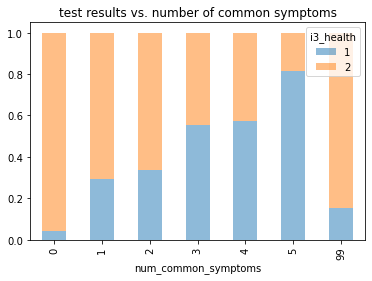

In [96]:
crosstab = pd.crosstab(df["num_common_symptoms"], df["i3_health"], normalize="index")
crosstab.plot(kind="bar", stacked=True, title="test results vs. number of common symptoms", alpha=0.5)

<AxesSubplot:title={'center':'test results vs. poor hygiene practice'}, xlabel='poor_hygiene_practice'>

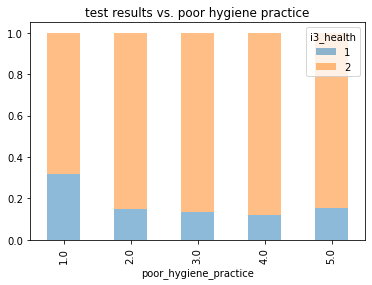

In [97]:
crosstab = pd.crosstab(df["poor_hygiene_practice"], df["i3_health"], normalize="index")
crosstab.plot(kind="bar", stacked=True, title="test results vs. poor hygiene practice", alpha=0.5)

<AxesSubplot:title={'center':'test results vs. number of chronic diseases'}, xlabel='num_chronic_disease'>

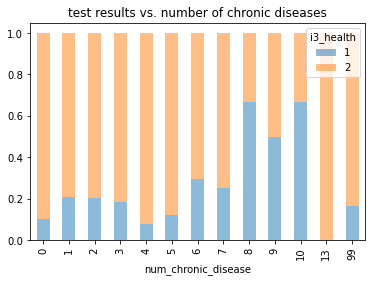

In [98]:
crosstab = pd.crosstab(df["num_chronic_disease"], df["i3_health"], normalize="index")
crosstab.plot(kind="bar", stacked=True, title="test results vs. number of chronic diseases", alpha=0.5)

<AxesSubplot:>

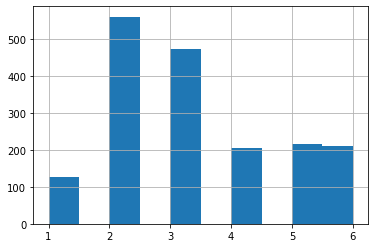

In [99]:
# equal-size binning
df.loc[df['age_bin1'] <= 20, 'age_bin1'] = 1
df.loc[(df['age_bin1'] > 20) & (df['age_bin1'] <= 30), 'age_bin1'] = 2
df.loc[(df['age_bin1'] > 30) & (df['age_bin1'] <= 40), 'age_bin1'] = 3
df.loc[(df['age_bin1'] > 40) & (df['age_bin1'] <= 50), 'age_bin1'] = 4
df.loc[(df['age_bin1'] > 50) & (df['age_bin1'] <= 60), 'age_bin1'] = 5
df.loc[(df['age_bin1'] > 60), 'age_bin1'] = 6
df["age_bin1"].hist()

<AxesSubplot:>

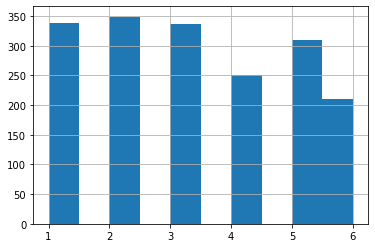

In [100]:
df.loc[df['age_bin2'] <= 24, 'age_bin2'] = 1
df.loc[(df['age_bin2'] > 24) & (df['age_bin2'] <= 30), 'age_bin2'] = 2
df.loc[(df['age_bin2'] > 30) & (df['age_bin2'] <= 37), 'age_bin2'] = 3
df.loc[(df['age_bin2'] > 37) & (df['age_bin2'] <= 45), 'age_bin2'] = 4
df.loc[(df['age_bin2'] > 45) & (df['age_bin2'] <= 60), 'age_bin2'] = 5
df.loc[(df['age_bin2'] > 60), 'age_bin2'] = 6
df["age_bin2"].hist()

<AxesSubplot:title={'center':'test results vs. age bins'}, xlabel='age_bin2'>

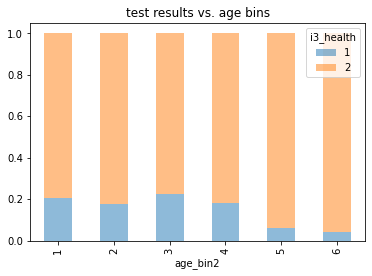

In [101]:
crosstab = pd.crosstab(df["age_bin2"], df["i3_health"], normalize="index")
crosstab.plot(kind="bar", stacked=True, title="test results vs. age bins", alpha=0.5)

The three new variables and the transformed all look good and seem to have an effect on being tested positive for COVID-19.

We will not use the age-binned variable, since the results may have been affected by undersampling of older populations, and the KNN model runs better without it.

## Final Selection of Predictors

The following have been chosen as our selected set of predictors:
* `i4_health`: Has someone in your household tested positive for COVID-19?
* `i14_health_99`: Will you work outside your home?
* `num_common_symptoms`: Number of common COVID symptom's one possessess. 
* `poor_hygiene_practice_bin`: Hygenic practice of an individual.
* `num_chronic_disease`: Number of chronic diseases one possessess. 

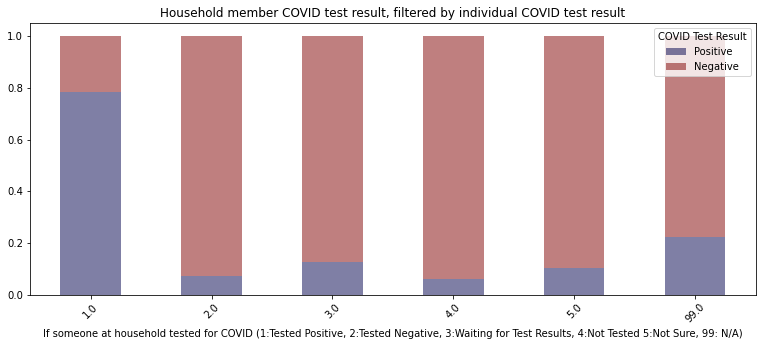

In [102]:
crosstab = pd.crosstab(df["i4_health"], df["i3_health"], normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Household member COVID test result, filtered by individual COVID test result", alpha=0.5, figsize=(13,5), cmap='seismic')
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("If someone at household tested for COVID (1:Tested Positive, 2:Tested Negative, 3:Waiting for Test Results, 4:Not Tested 5:Not Sure, 99: N/A)")
plt.show()

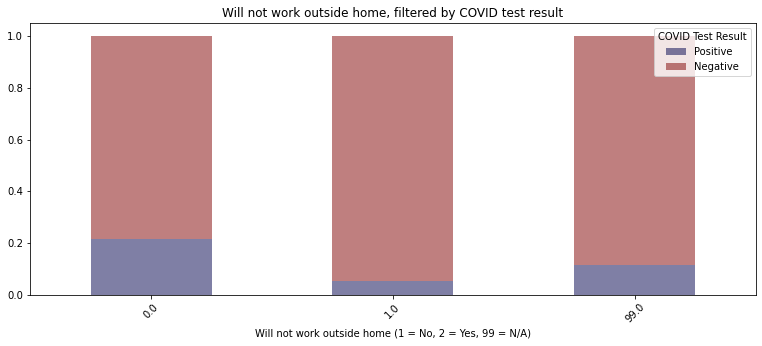

In [103]:
crosstab = pd.crosstab(df["i14_health_99"], df["i3_health"], normalize="index")
crosstab.plot(kind="bar", stacked=True, title="Will not work outside home, filtered by COVID test result", alpha=0.5,figsize=(13,5), cmap='seismic')
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Will not work outside home (1 = No, 2 = Yes, 99 = N/A)")
plt.show()

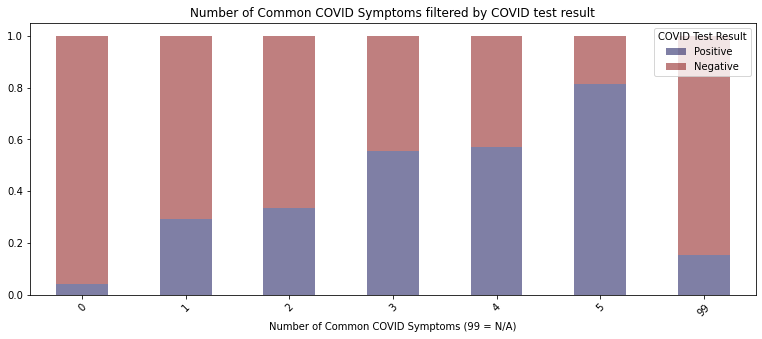

In [104]:
crosstab = pd.crosstab(df["num_common_symptoms"], df["i3_health"], normalize="index")
crosstab.plot(kind="bar", stacked=True, title="Number of Common COVID Symptoms filtered by COVID test result", alpha=0.5,figsize=(13,5), cmap='seismic')
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Number of Common COVID Symptoms (99 = N/A)")
plt.show()

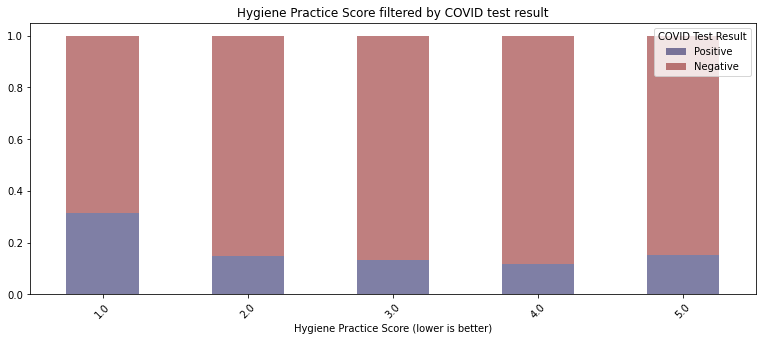

In [105]:
crosstab = pd.crosstab(df["poor_hygiene_practice"], df["i3_health"], normalize="index")
crosstab.plot(kind="bar", stacked=True, title="Hygiene Practice Score filtered by COVID test result", alpha=0.5,figsize=(13,5), cmap='seismic')
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Hygiene Practice Score (lower is better)")
plt.show()

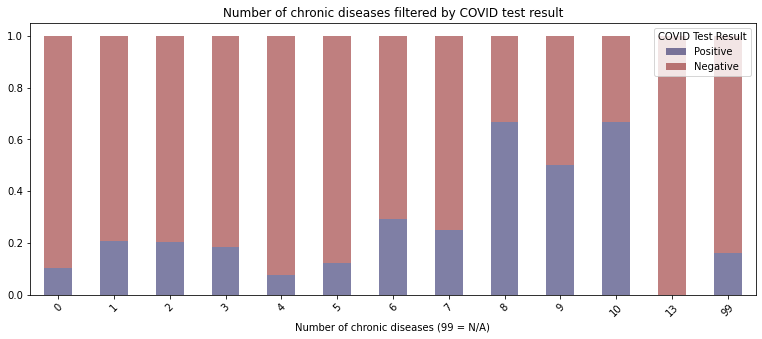

In [106]:
crosstab = pd.crosstab(df["num_chronic_disease"], df["i3_health"], normalize="index")
crosstab.plot(kind="bar", stacked=True, title="Number of chronic diseases filtered by COVID test result", alpha=0.5,figsize=(13,5), cmap='seismic')
plt.xticks(rotation=45)
plt.legend(title='COVID Test Result', loc='upper right', labels=['Positive', 'Negative'])
plt.xlabel("Number of chronic diseases (99 = N/A)")
plt.show()

# KNN Modelling

- What is a choice of k that balance between overfitting and ignoring the predictor and information?
- Tune the model
- Carefully consider all points that we discussed in class with respect to k-NN
- Show the classification matrix for the test data that results from using the best model parameters. 

Import relevant packages:

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, recall_score

### Split into X and Y train and test sets, and scale the X data

In [108]:
y = df['i3_health']

In [109]:
X = df[["i4_health", "num_common_symptoms", "num_chronic_disease", "i14_health_99"]]

In [110]:
X = np.array(X)

In [111]:
X.shape, y.shape

((1795, 4), (1795,))

In [112]:
seed = 117
test_size = 0.35

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [114]:
X_train.shape, X_test.shape

((1166, 4), (629, 4))

In [115]:
y_train.shape, y_test.shape

((1166,), (629,))

In [116]:
scaler = StandardScaler().fit(X_train) 

In [117]:
rescaledX_train = scaler.transform(X_train)

In [118]:
rescaledX_test = scaler.transform(X_test)

### Tuning and Validation

For scoring, as our target variable is not balanced, we probably want to go with f1 score or precision/recall.

In [119]:
num_folds = 10
scoring = 'recall'  # f1_score/recall? roc_auc/f1_micro/accuracy/recall

In [120]:
model = KNeighborsClassifier()

In [121]:
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

In [122]:
k_values = np.arange(1,21)
param_grid = dict(n_neighbors=k_values)

In [123]:
model = KNeighborsClassifier()

In [124]:
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring, cv=kfold)

In [125]:
grid_result = grid.fit(rescaledX_train,y_train)

In [126]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.625033 using {'n_neighbors': 2}


In [127]:
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.495453 (0.144403) with: {'n_neighbors': 1}
0.625033 (0.126899) with: {'n_neighbors': 2}
0.492673 (0.123175) with: {'n_neighbors': 3}
0.529948 (0.101047) with: {'n_neighbors': 4}
0.497710 (0.119235) with: {'n_neighbors': 5}
0.503266 (0.117911) with: {'n_neighbors': 6}
0.476469 (0.118188) with: {'n_neighbors': 7}
0.472226 (0.113960) with: {'n_neighbors': 8}
0.452082 (0.095204) with: {'n_neighbors': 9}
0.459774 (0.098700) with: {'n_neighbors': 10}
0.445683 (0.108685) with: {'n_neighbors': 11}
0.445683 (0.108685) with: {'n_neighbors': 12}
0.436138 (0.119919) with: {'n_neighbors': 13}
0.450142 (0.126030) with: {'n_neighbors': 14}
0.429910 (0.132624) with: {'n_neighbors': 15}
0.444644 (0.114296) with: {'n_neighbors': 16}
0.406198 (0.122891) with: {'n_neighbors': 17}
0.422636 (0.130898) with: {'n_neighbors': 18}
0.400087 (0.123985) with: {'n_neighbors': 19}
0.400087 (0.123985) with: {'n_neighbors': 20}


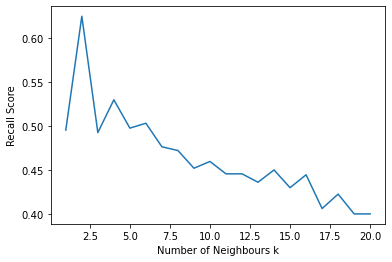

In [128]:
plt.plot(k_values, means)
plt.xlabel("Number of Neighbours k")
plt.ylabel("Recall Score")
plt.show()

### Check scores on test set

In [129]:
model_selected = KNeighborsClassifier(n_neighbors=grid_result.best_params_["n_neighbors"])

In [130]:
model_selected.fit(rescaledX_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [131]:
y_pred = model_selected.predict(rescaledX_test)

In [132]:
accuracy_score(y_test,y_pred)

0.8044515103338633

In [133]:
f1_score(y_test,y_pred)

0.49382716049382713

In [134]:
roc_auc_score(y_test,y_pred)

0.728451282846291

In [135]:
recall_score(y_test,y_pred)

0.6185567010309279

In [136]:
cm_test = confusion_matrix(y_test,y_pred)

update the target variable using 0 and 1 (for better interpretability).

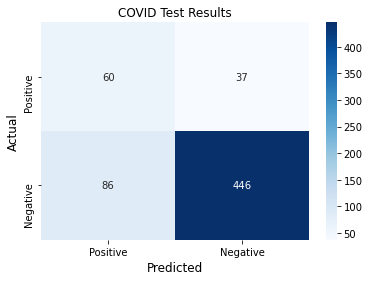

In [144]:
sns.heatmap(cm_test, annot=True,fmt='d',cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12) 
plt.title('COVID Test Results')
plt.show()

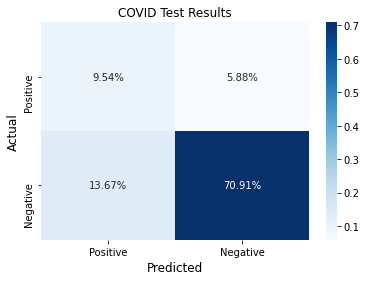

In [143]:
sns.heatmap(cm_test/np.sum(cm_test), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12) 
plt.title('COVID Test Results')
plt.show()

### Iterate the model using different random seeds
For a total of 30 iterations, and then we will use avearge scores

In [139]:
import random
seeds = [random.randint(0,500) for i in range(30)]
k_values = np.arange(1,21)
param_grid = dict(n_neighbors=k_values)
accuracy_list = []
f1_score_list = []
roc_auc_list = []
recall_list = []

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    scaler = StandardScaler().fit(X_train) 
    rescaledX_train = scaler.transform(X_train)
    model = KNeighborsClassifier()
    grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring, cv=kfold)
    grid_result = grid.fit(rescaledX_train,y_train)
    model_selected = KNeighborsClassifier(n_neighbors=grid_result.best_params_["n_neighbors"])
    model_selected.fit(rescaledX_train, y_train)
    rescaledX_test = scaler.transform(X_test)
    y_pred = model_selected.predict(rescaledX_test)
    accuracy_list.append(accuracy_score(y_test,y_pred))
    f1_score_list.append(f1_score(y_test,y_pred))
    roc_auc_list.append(roc_auc_score(y_test,y_pred))
    recall_list.append(recall_score(y_test,y_pred))

In [140]:
[np.average(accuracy_list), np.average(f1_score_list), np.average(roc_auc_list), np.average(recall_list)]

[0.8038155802861685,
 0.5018199724445228,
 0.7362258818795877,
 0.6385568215613359]

Here, we can see the Accuracy, F1 Score, ROC_AUC Score, and Recall score through the 30 iterations

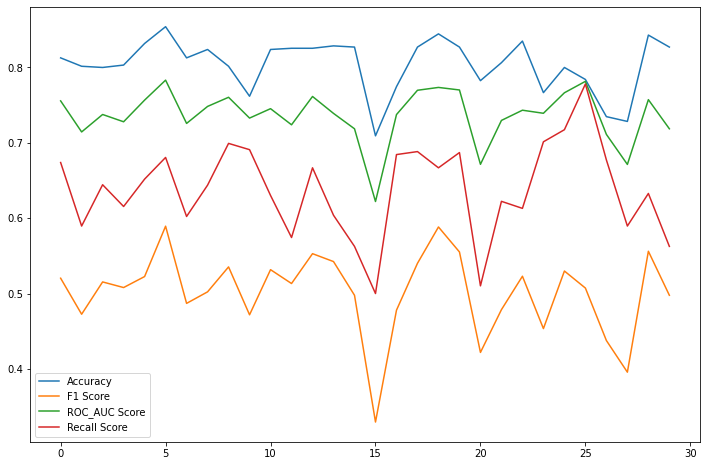

In [141]:
plt.figure(figsize=(12,8))
plt.plot(range(len(accuracy_list)),accuracy_list,label='Accuracy')
plt.plot(range(len(accuracy_list)),f1_score_list,label='F1 Score')
plt.plot(range(len(accuracy_list)),roc_auc_list,label='ROC_AUC Score')
plt.plot(range(len(accuracy_list)),recall_list, label='Recall Score')
plt.legend(loc=0)
plt.show()

Below we can better see the variations in the different scores relative to the average score for each metric.

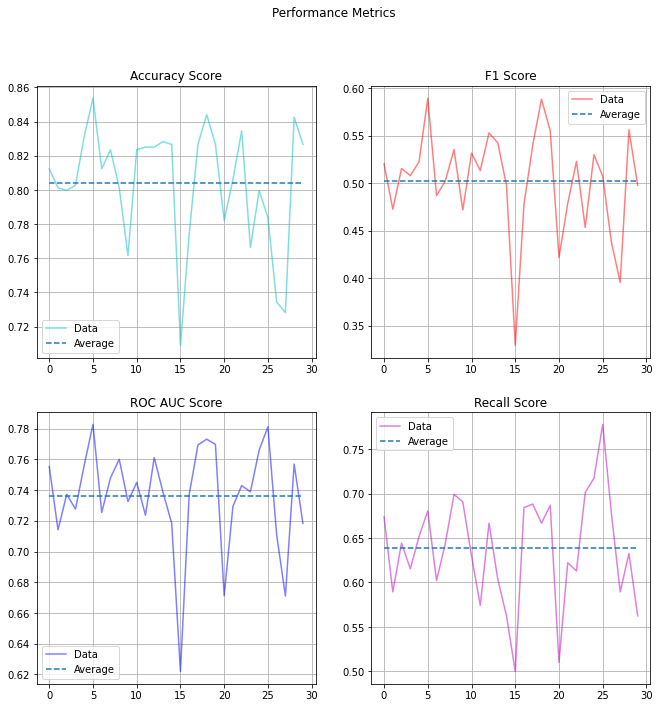

In [142]:
fig, axes = plt.subplots(2,2,figsize=(11, 11))
x = np.linspace(0,len(accuracy_list)-1,len(accuracy_list))
axes[0,0].plot(accuracy_list, alpha=0.5, color='c',label='Data')
axes[0,1].plot(f1_score_list, alpha=0.5, color='r',label='Data')
axes[1,0].plot(roc_auc_list, alpha=0.5, color='b',label='Data')
axes[1,1].plot(recall_list, alpha=0.5, color='m',label='Data')
axes[0,0].plot(x,[np.average(accuracy_list)]*len(accuracy_list),'--',label='Average')
axes[0,1].plot(x,[np.average(f1_score_list)]*len(f1_score_list),'--',label='Average')
axes[1,0].plot(x,[np.average(roc_auc_list)]*len(roc_auc_list),'--',label='Average')
axes[1,1].plot(x,[np.average(recall_list)]*len(recall_list),'--',label='Average')
axes[0,0].set_title("Accuracy Score")
axes[0,1].set_title("F1 Score")
axes[1,0].set_title("ROC AUC Score")
axes[1,1].set_title("Recall Score")
axes[0,0].grid()
axes[0,1].grid()
axes[1,0].grid()
axes[1,1].grid()
axes[0,0].legend()
axes[0,1].legend()
axes[1,0].legend()
axes[1,1].legend()
fig.suptitle("Performance Metrics")
plt.show()